In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


### Loading Dataset


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data.csv')

In [4]:
# Identifying Data Rows and Columns info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [5]:
# Observing Data - All Columns
pd.options.display.max_columns = None
display(data)

#Observation
#1. Policy Tenure conversion required
#2. Age of Car conversion required
#3. Age of Policy Holder conversion required



,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [6]:
# Checking any null values
data.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [7]:
#Checking columns with unique values
data.nunique()

policy_id                           58592
policy_tenure                       58592
age_of_car                             49
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                          

In [8]:
#For converting age columns itno more understandable format //
print(max(data['age_of_car']))
print(max(data['age_of_policyholder']))
print(max(data['policy_tenure']))

# Max value is 1 year or care_age, Policyholder_Age and 1.39yrs fpr policy tenure



1.0
1.0
1.39664107699389


In [9]:
#  convert years to months

data['age_of_car'] = (data['age_of_car']*12).round(1)
data['age_of_policyholder'] = (data['age_of_policyholder']*12).round(1)
data['policy_tenure'] = (data['policy_tenure']*12).round(1)


In [10]:
data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,6.2,0.6,7.7,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,8.1,0.2,4.5,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,10.1,0.2,4.6,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,10.8,1.3,5.2,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,7.2,1.3,7.6,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [11]:
# Encoding Age of Car columns and Age of Policy_Holder Encoded
data['age_of_car_encoded'] = data['age_of_car'].apply(lambda x: 'less than 6 months' if x < 6 else 'more than 6 months')
data['age_of_policyholder_encoded'] = data['age_of_policyholder'].apply(lambda x: 'less than 6 months' if x < 6 else 'more than 6 months')

data = data.drop(['age_of_car','age_of_policyholder'],axis=1)


In [12]:
# correcting data types from float to int
float_cols = data.select_dtypes(include=['float']).columns
data[float_cols] = data[float_cols].astype(int)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   policy_id                         58592 non-null  object
 1   policy_tenure                     58592 non-null  int64 
 2   area_cluster                      58592 non-null  object
 3   population_density                58592 non-null  int64 
 4   make                              58592 non-null  int64 
 5   segment                           58592 non-null  object
 6   model                             58592 non-null  object
 7   fuel_type                         58592 non-null  object
 8   max_torque                        58592 non-null  object
 9   max_power                         58592 non-null  object
 10  engine_type                       58592 non-null  object
 11  airbags                           58592 non-null  int64 
 12  is_esc            

<ipython-input-14-72efb23f237a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage.index, y=percentage.values, palette=['#00FF00','#FF0000'])


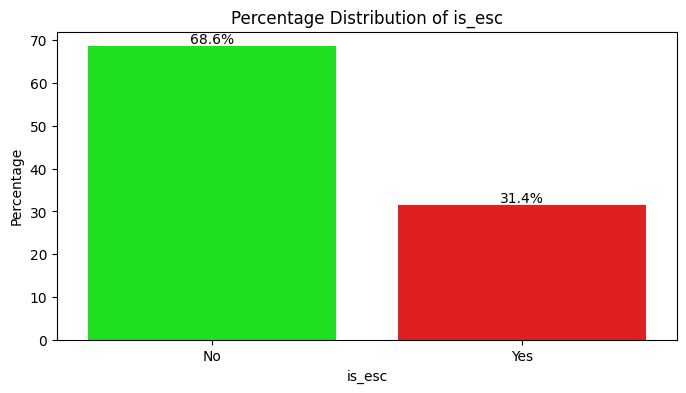

<ipython-input-14-72efb23f237a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage.index, y=percentage.values, palette=['#00FF00','#FF0000'])


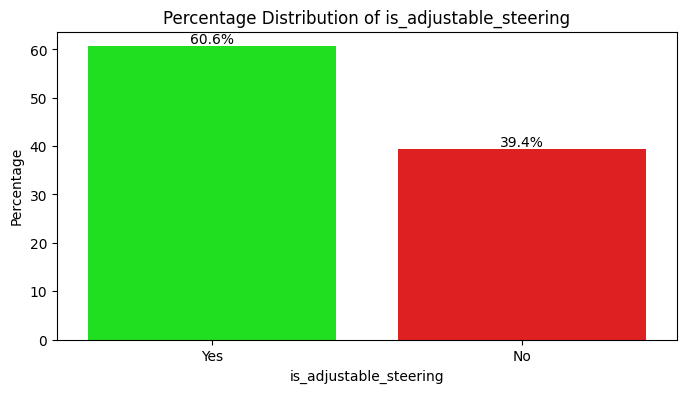

<ipython-input-14-72efb23f237a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage.index, y=percentage.values, palette=['#00FF00','#FF0000'])


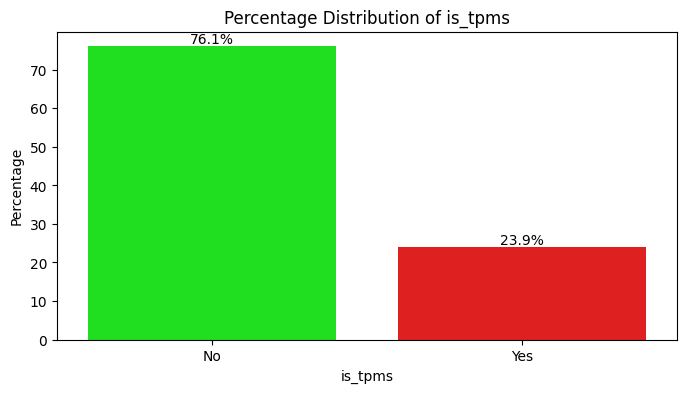

<ipython-input-14-72efb23f237a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage.index, y=percentage.values, palette=['#00FF00','#FF0000'])


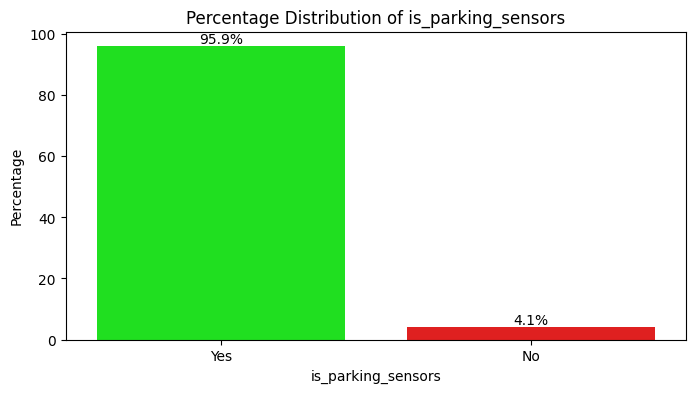

<ipython-input-14-72efb23f237a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage.index, y=percentage.values, palette=['#00FF00','#FF0000'])


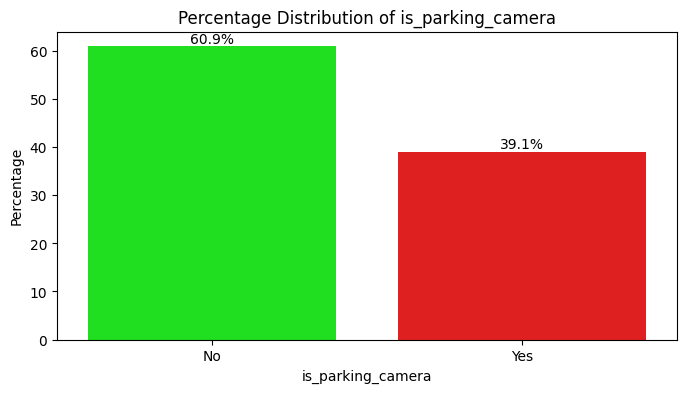

<ipython-input-14-72efb23f237a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage.index, y=percentage.values, palette=['#00FF00','#FF0000'])


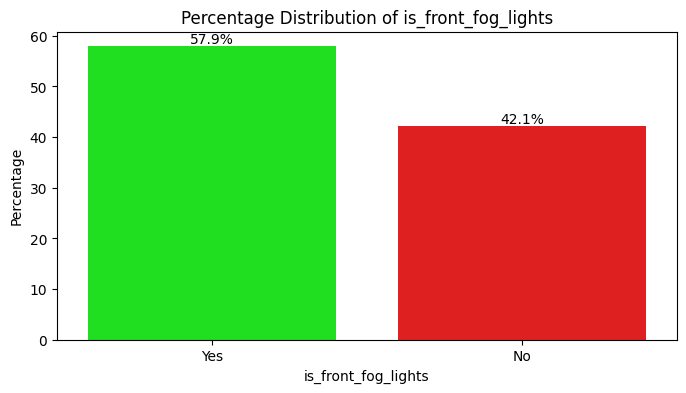

<ipython-input-14-72efb23f237a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage.index, y=percentage.values, palette=['#00FF00','#FF0000'])


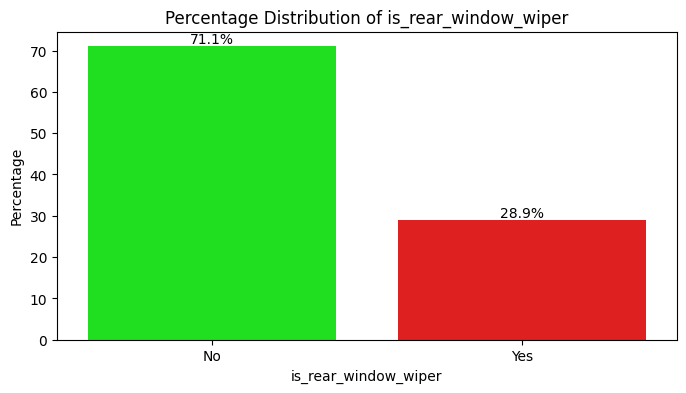

<ipython-input-14-72efb23f237a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage.index, y=percentage.values, palette=['#00FF00','#FF0000'])


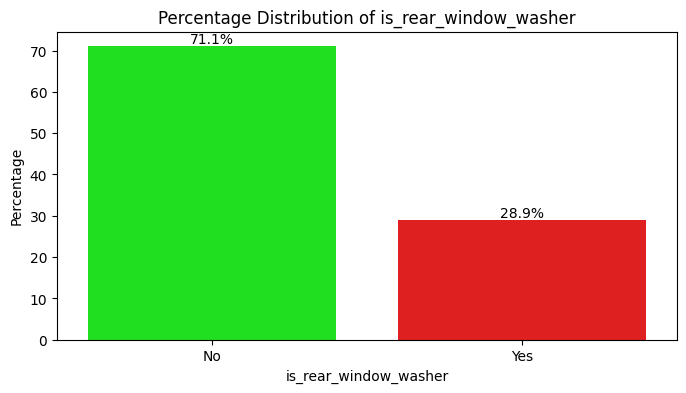

<ipython-input-14-72efb23f237a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage.index, y=percentage.values, palette=['#00FF00','#FF0000'])


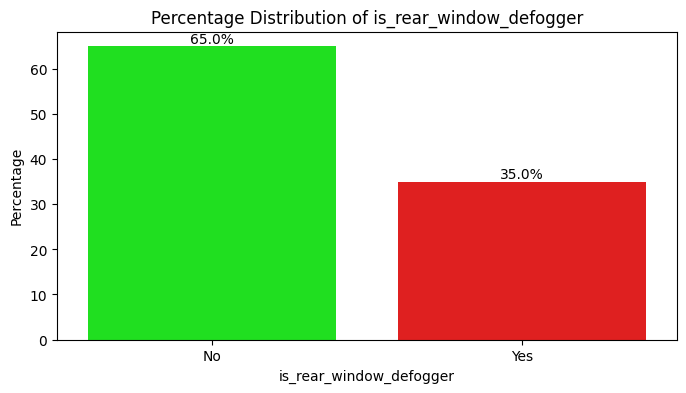

<ipython-input-14-72efb23f237a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage.index, y=percentage.values, palette=['#00FF00','#FF0000'])


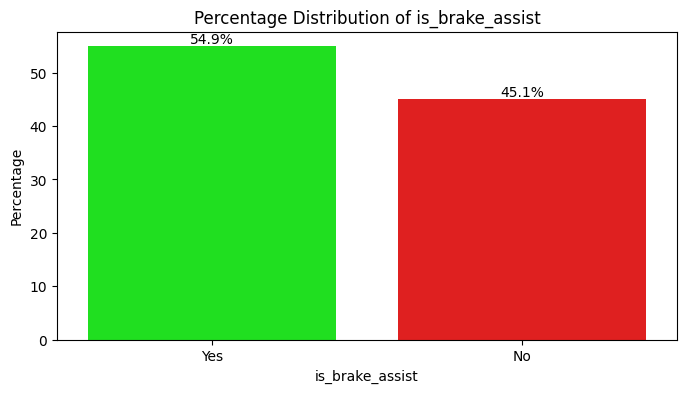

<ipython-input-14-72efb23f237a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage.index, y=percentage.values, palette=['#00FF00','#FF0000'])


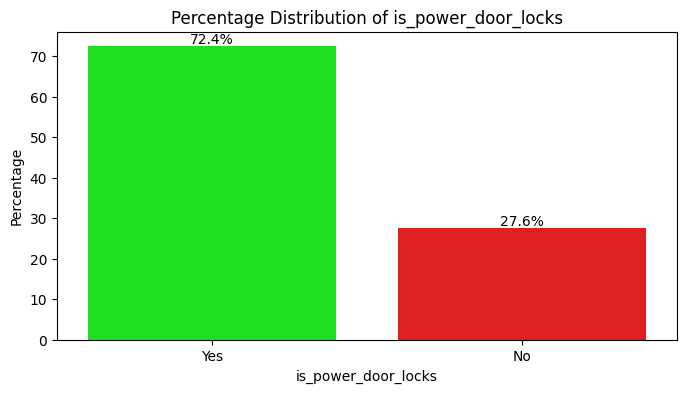

<ipython-input-14-72efb23f237a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage.index, y=percentage.values, palette=['#00FF00','#FF0000'])


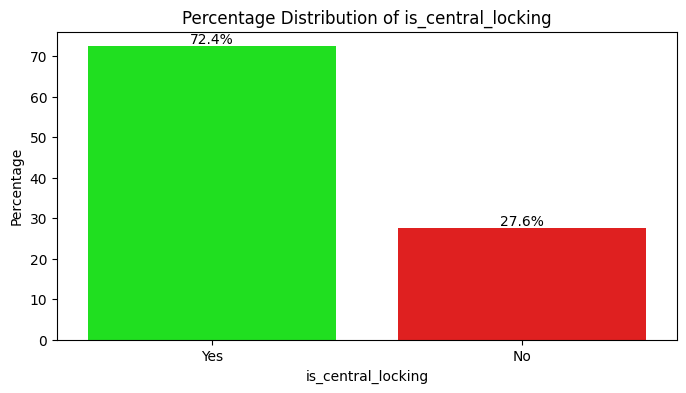

<ipython-input-14-72efb23f237a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage.index, y=percentage.values, palette=['#00FF00','#FF0000'])


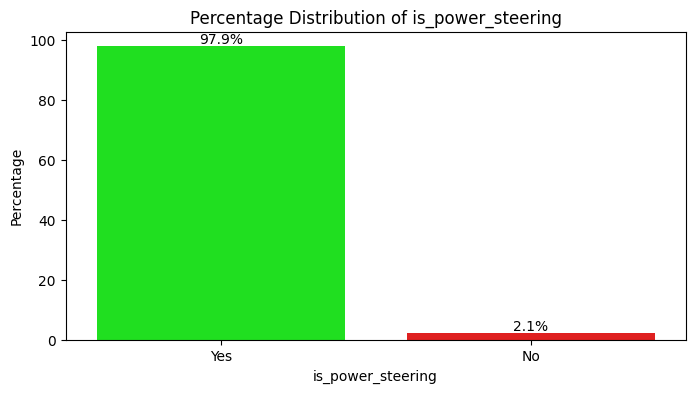

<ipython-input-14-72efb23f237a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage.index, y=percentage.values, palette=['#00FF00','#FF0000'])


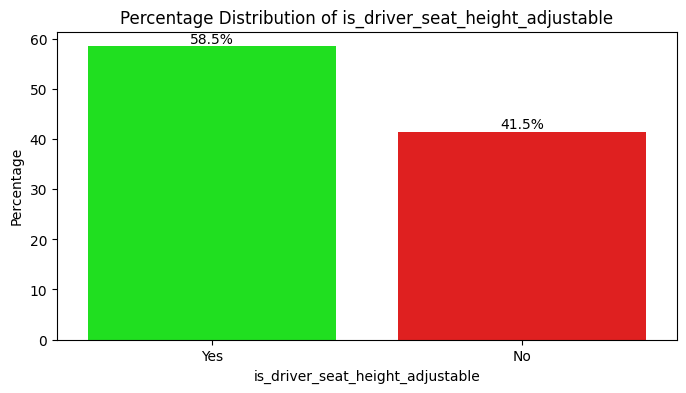

<ipython-input-14-72efb23f237a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage.index, y=percentage.values, palette=['#00FF00','#FF0000'])


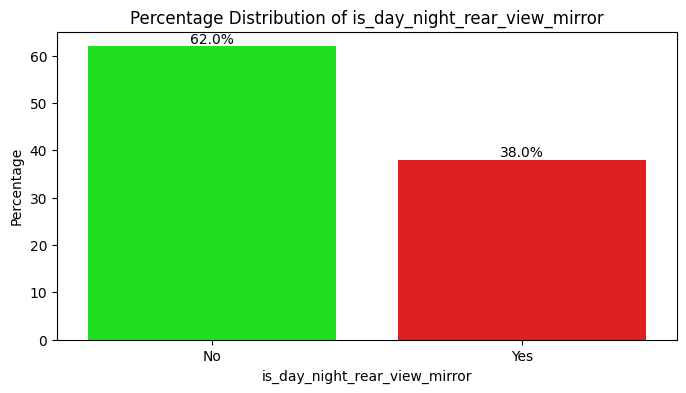

<ipython-input-14-72efb23f237a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage.index, y=percentage.values, palette=['#00FF00','#FF0000'])


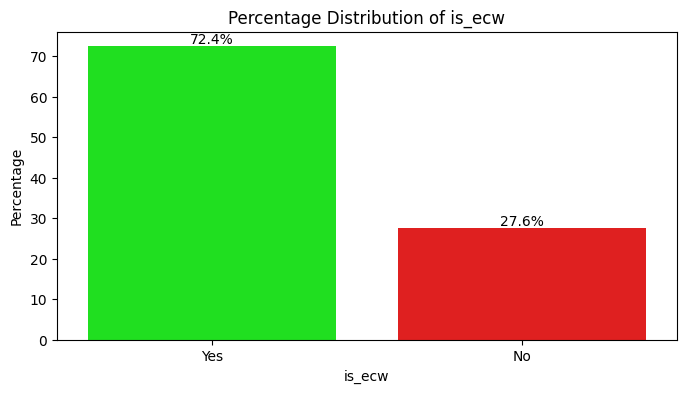

<ipython-input-14-72efb23f237a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage.index, y=percentage.values, palette=['#00FF00','#FF0000'])


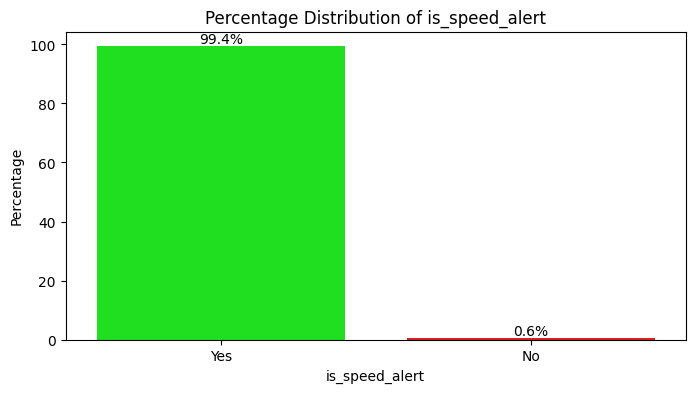

In [14]:
# Many Columns have binary data so analysing its distribution
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

# Identify categorical columns containing 'yes' and 'no'
yes_no_cols = [col for col in df.select_dtypes(include=['object']).columns if df[col].isin(['Yes', 'No']).all()]

# Plot distribution for each 'yes'/'no' column
for col in yes_no_cols:
    plt.figure(figsize=(8, 4))
    total_count = data[col].count()
    percentage = (data[col].value_counts() / total_count) * 100
    sns.barplot(x=percentage.index, y=percentage.values, palette=['#00FF00','#FF0000'])
    plt.title(f'Percentage Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    for index, value in enumerate(percentage.values):
        plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom')
    plt.show()


In [15]:
# Columns with only 90% of same value drop
data = data.drop(['is_speed_alert', 'is_power_steering'], axis =1)

In [16]:

# Identify categorical columns containing 'yes' and 'no'
yes_no_cols = [col for col in data.select_dtypes(include=['object']).columns if data[col].isin(['Yes', 'No']).all()]

# Replace 'yes' with 1 and 'no' with 0 in the identified columns and cast to int
data[yes_no_cols] = data[yes_no_cols].replace({'Yes': 1, 'No': 0}).astype(int)

In [17]:
data.head()

,policy_id,policy_tenure,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,ncap_rating,is_claim,age_of_car_encoded,age_of_policyholder_encoded
0,ID00001,6,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4,3445,1515,1475,1185,0,0,0,0,0,0,0,0,0,0,0,0,less than 6 months,more than 6 months
1,ID00002,8,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4,3445,1515,1475,1185,0,0,0,0,0,0,0,0,0,0,0,0,less than 6 months,less than 6 months
2,ID00003,10,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4,3445,1515,1475,1185,0,0,0,0,0,0,0,0,0,0,0,0,less than 6 months,less than 6 months
3,ID00004,10,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,2,0,less than 6 months,less than 6 months
4,ID00005,7,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5,3731,1579,1490,1155,0,0,0,0,0,1,1,0,1,1,2,0,less than 6 months,more than 6 months


In [18]:
data['fuel_type'].value_counts()

Petrol    20532
CNG       20330
Diesel    17730
Name: fuel_type, dtype: int64

In [19]:
DataP=data
#DataP['age_of_car_encoded'] = data[yes_no_cols].replace({'Yes': 1, 'No': 0}).astype(int)
#DataP = data.loc[data['fuel_type'] == 'Petrol']
#DataP.head()

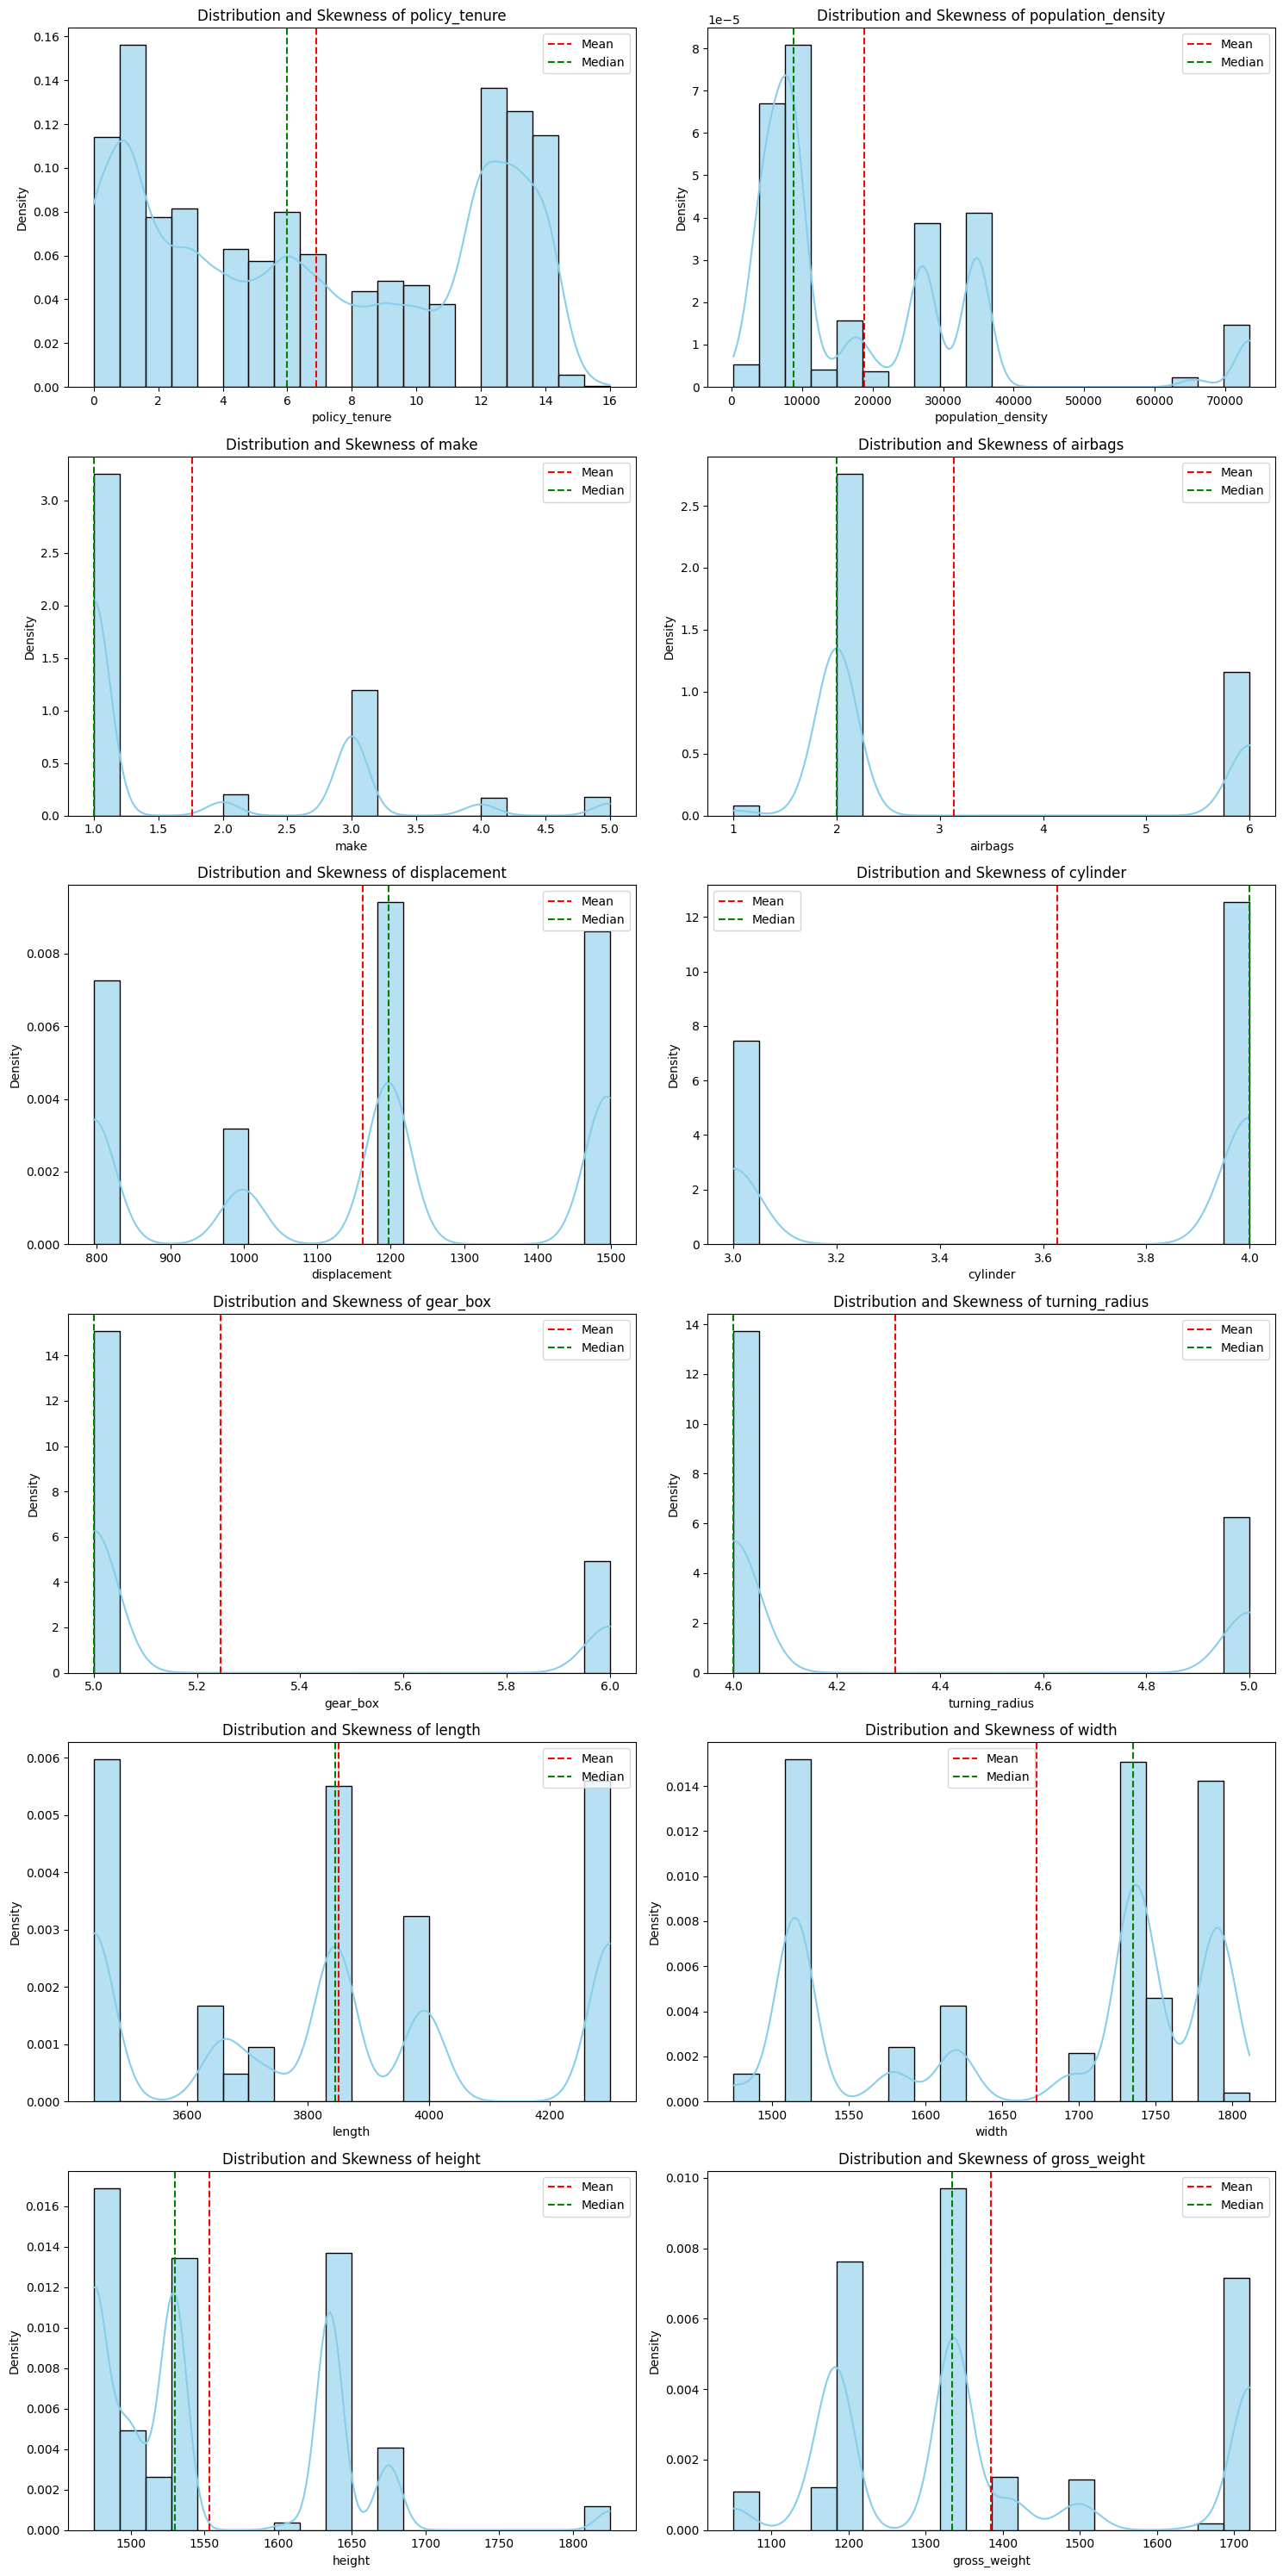

In [20]:
col = ['policy_tenure','population_density','make','airbags','displacement','cylinder','gear_box', 'turning_radius','length','width','height','gross_weight']

df = pd.DataFrame(data, columns=col)

# Set the number of rows and columns for subplots
num_columns = len(df.columns)
num_rows = (num_columns + 1) // 2  # Two plots per row

plt.figure(figsize=(15, 5 * num_rows))

# Plot skewness for each numerical column
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 2, i + 1)
    sns.histplot(df[column], kde=True, stat="density", bins=20, color='skyblue', alpha=0.6)
    plt.axvline(df[column].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df[column].median(), color='green', linestyle='--', label='Median')
    plt.title(f'Distribution and Skewness of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

#Observation

#1. Skewness identified in population density Data, height, width


In [21]:
# Correcting Skewness in necessary columns


DataP['width'] = np.cbrt(DataP['width'])
DataP['height'] = np.cbrt(DataP['height'])
DataP['displacement'] = np.cbrt(DataP['displacement'])
DataP['population_density'] = np.cbrt(DataP['population_density'])



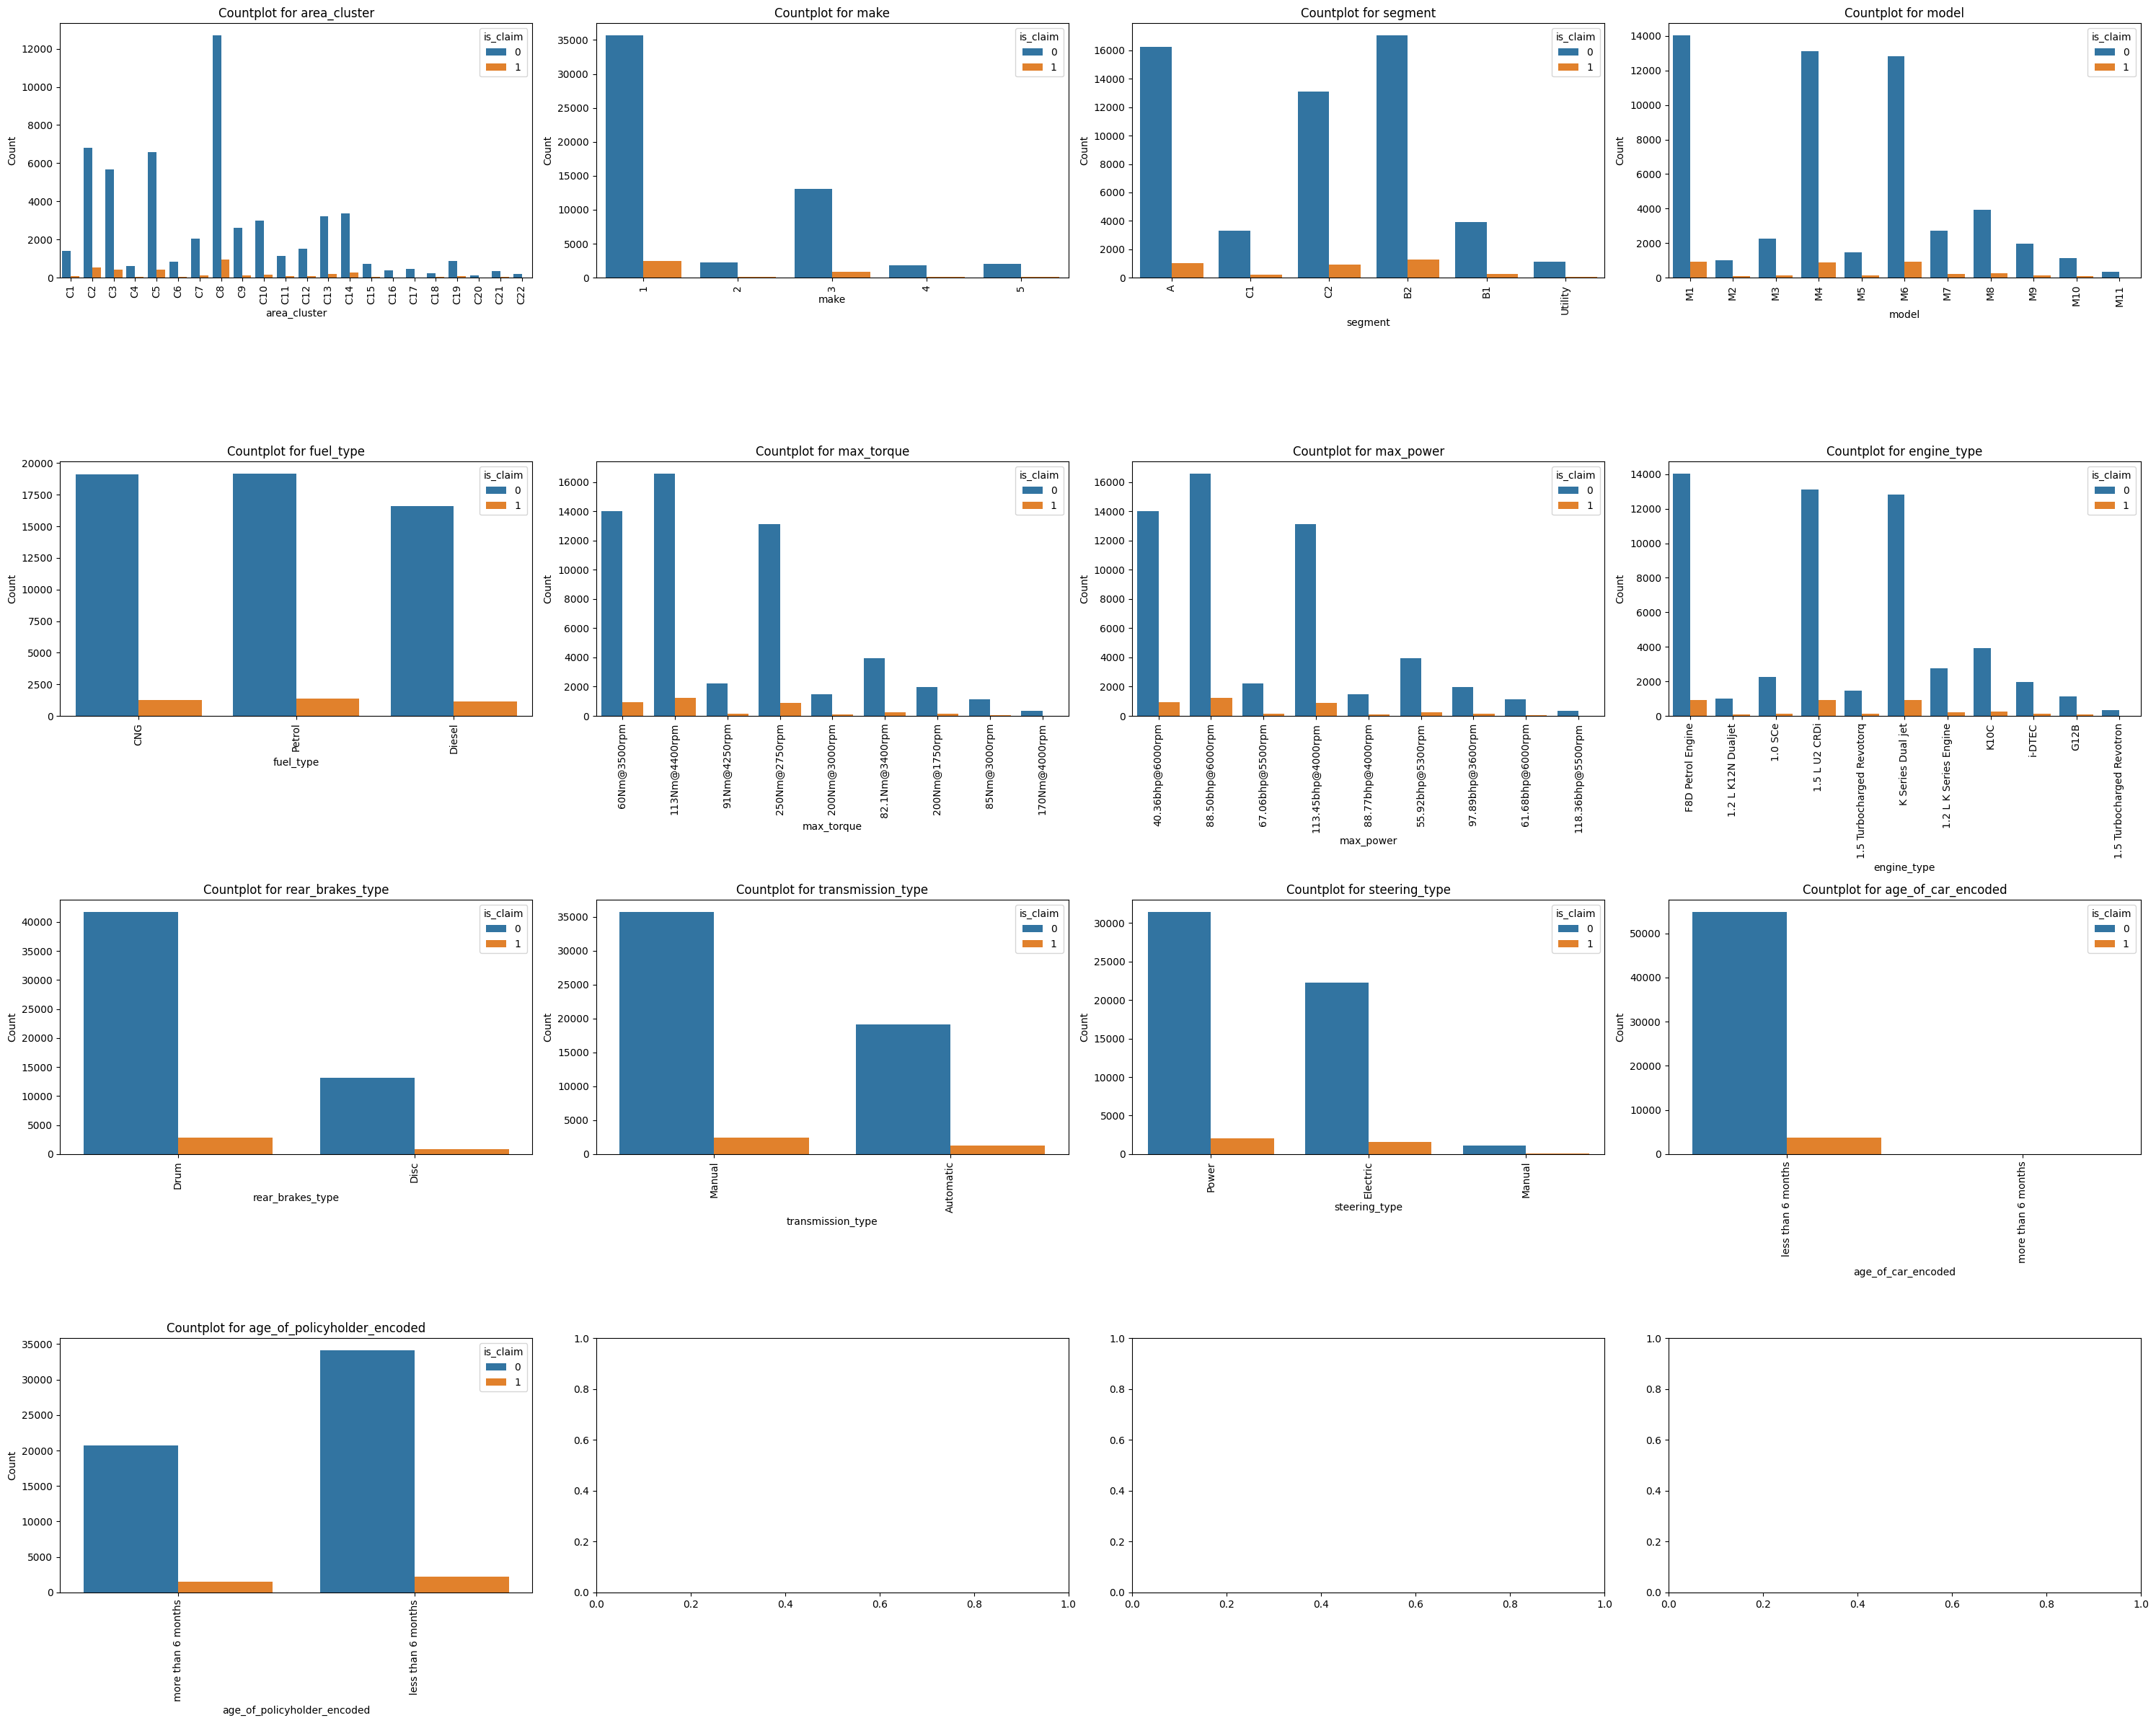

In [22]:
# Create the figure and subplots
fig, axes = plt.subplots(4,4, figsize=(30,24))
axes = axes.flatten()

cols_1=['area_cluster','make' ,'segment', 'model', 'fuel_type', 'max_torque','max_power', 'engine_type', 'rear_brakes_type', 'transmission_type','steering_type', 'age_of_car_encoded', 'age_of_policyholder_encoded']

for i, column in enumerate(cols_1):
    ax = axes[i]  # Select the current subplot

    # Plot the countplot
    sns.countplot(data=DataP, x=column, ax=ax, hue='is_claim')
    ax.set_title(f'Countplot for {column}')

    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels if need


# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


#observation
#1. From C8 area cluster claim is grater in comarison to other clusters
#2. MAke 1 Category posses high claims
#3. Segment B2 shows high claim
#4. Model 4 posses high claim
#5. 113#nm torque posses high claims
#6. max power 88.50bph posses high claim
#7. Drum BRakes cars tend s to file high claim
#8. Manual transmission cars tends to file high claims
#9. Power steering cars file high claim
#10. Cars aging less than 6 month tends to file claim
#11. Just after taking policy within 6 months more claims are filed



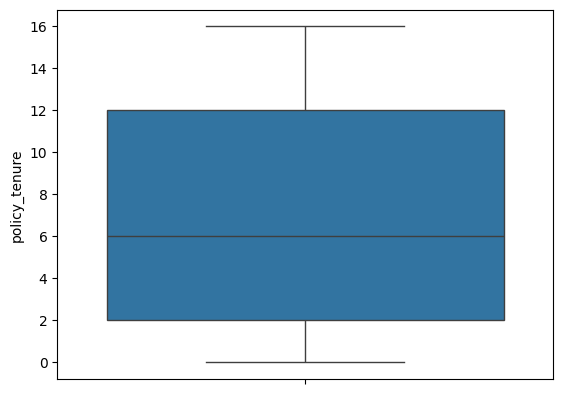

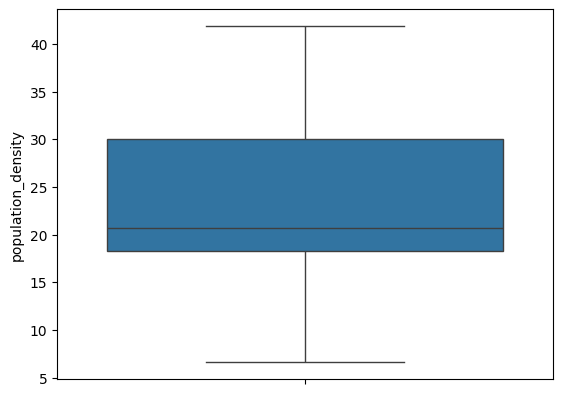

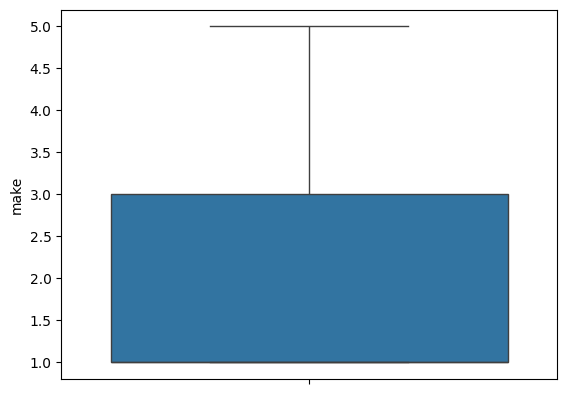

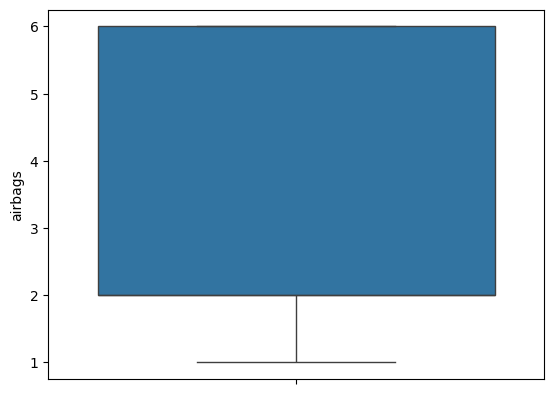

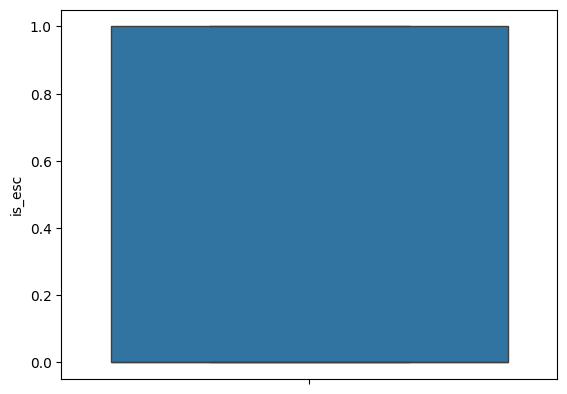

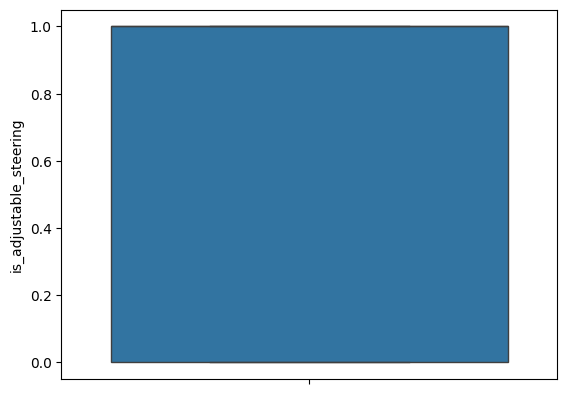

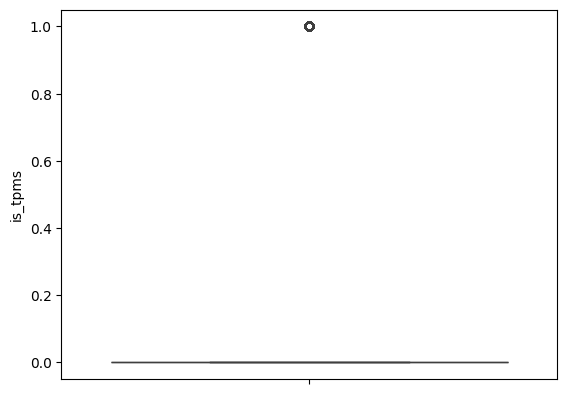

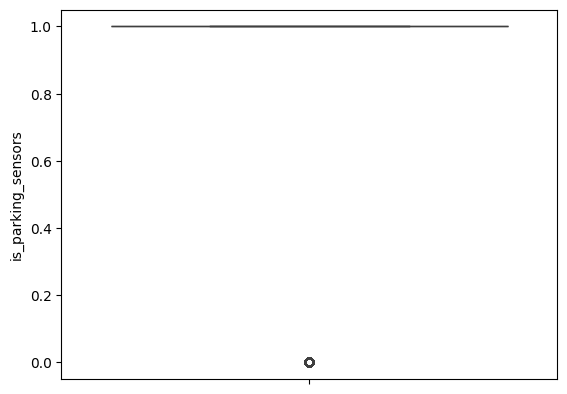

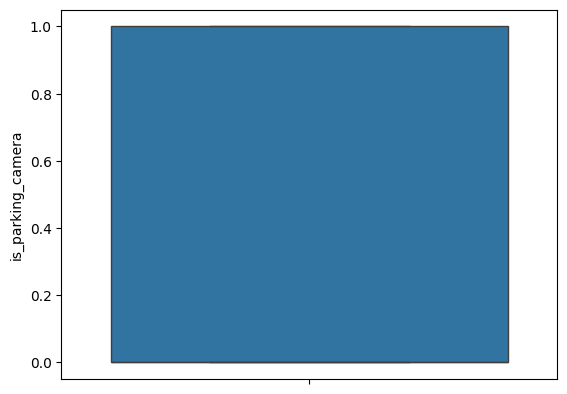

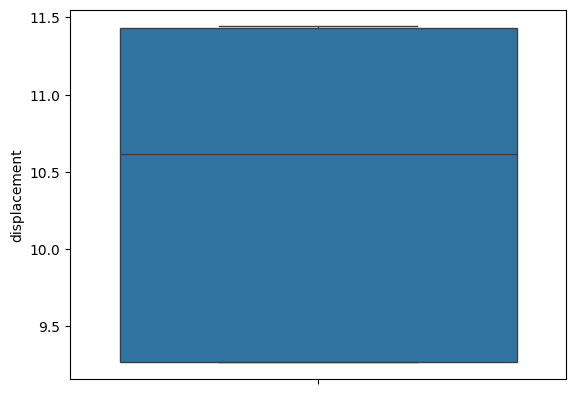

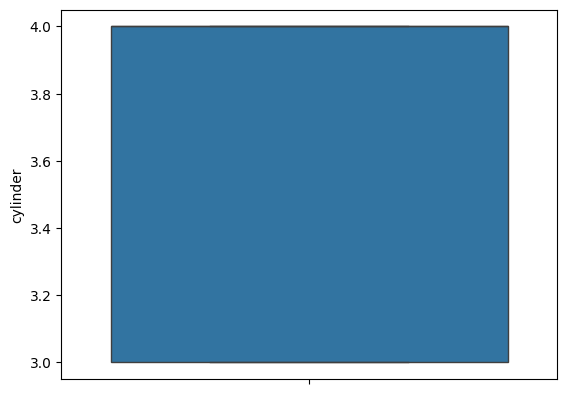

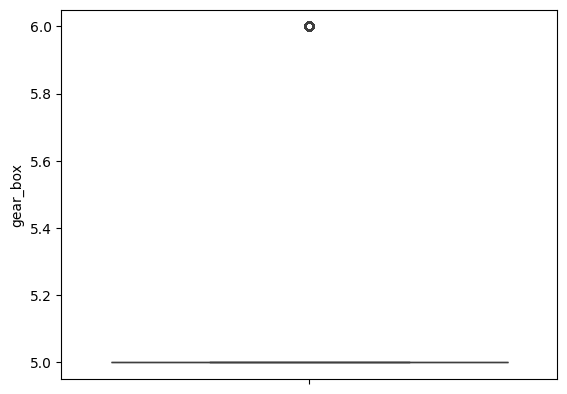

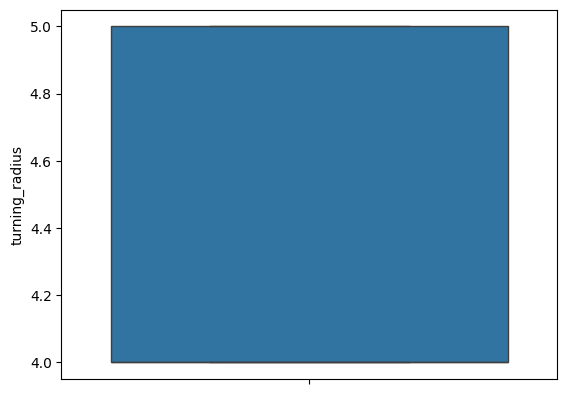

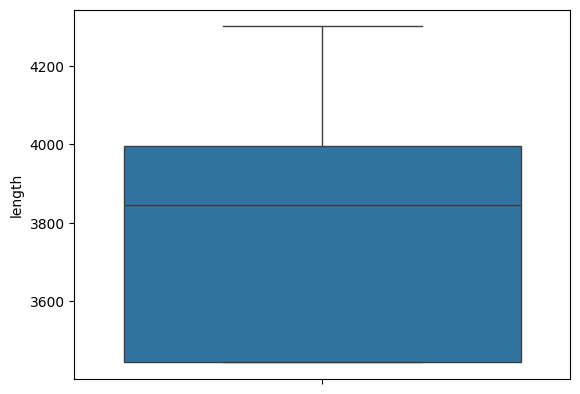

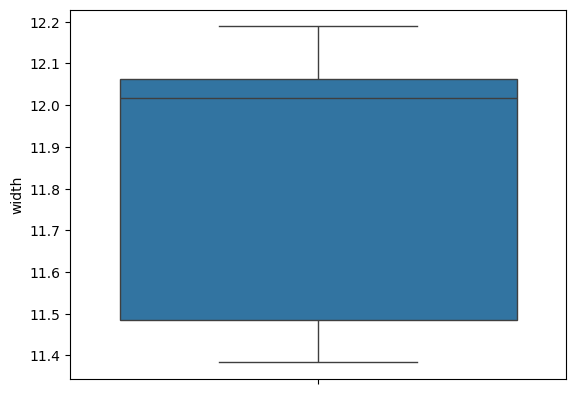

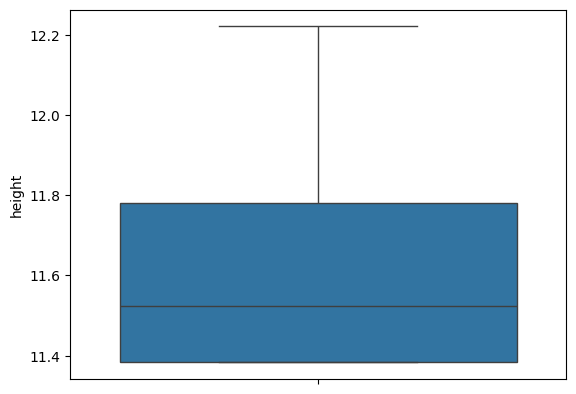

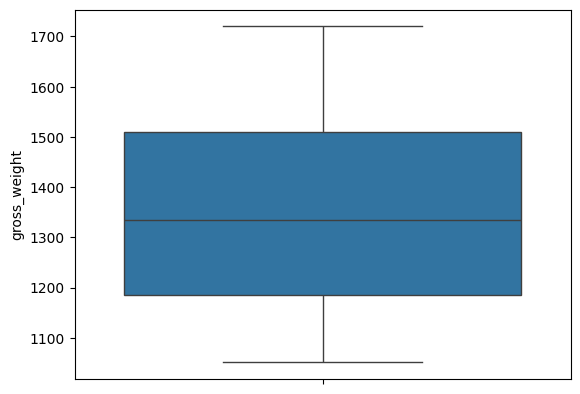

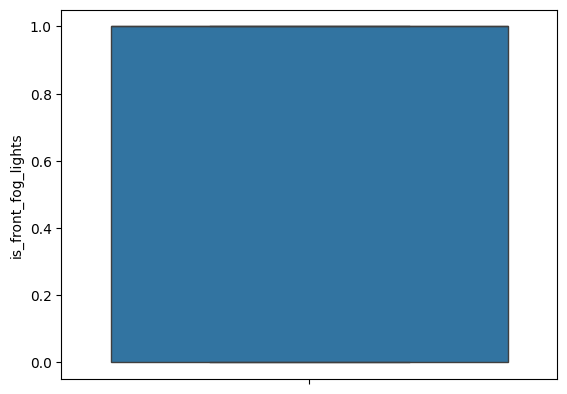

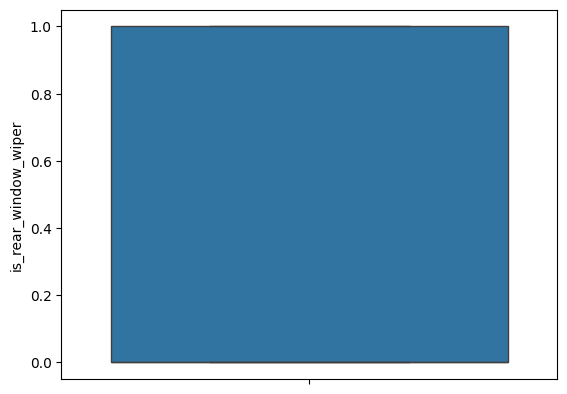

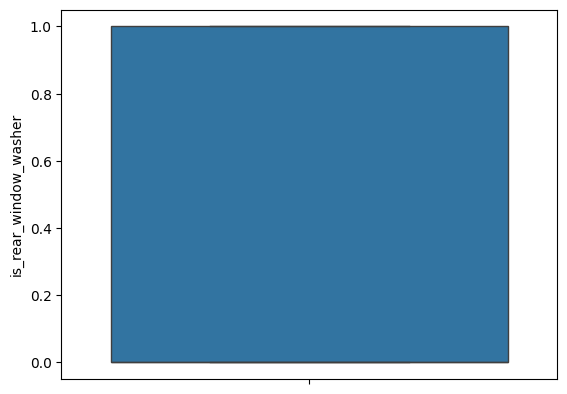

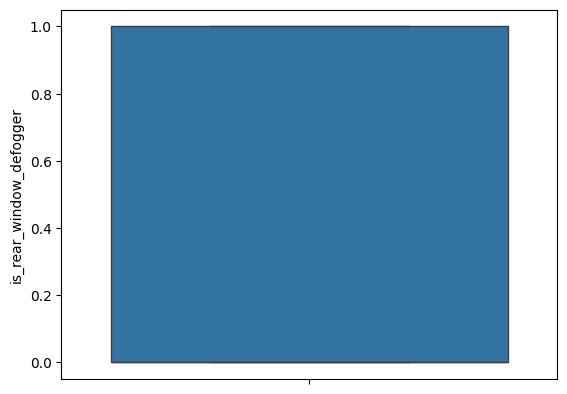

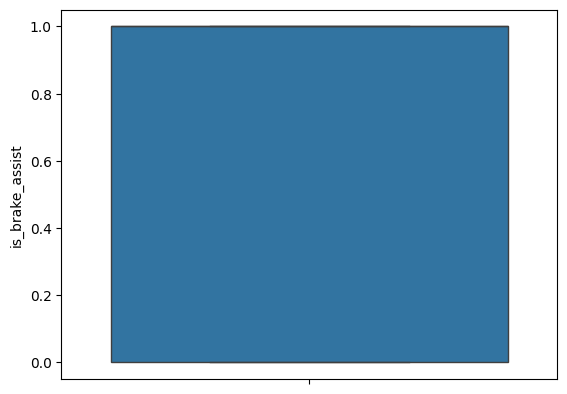

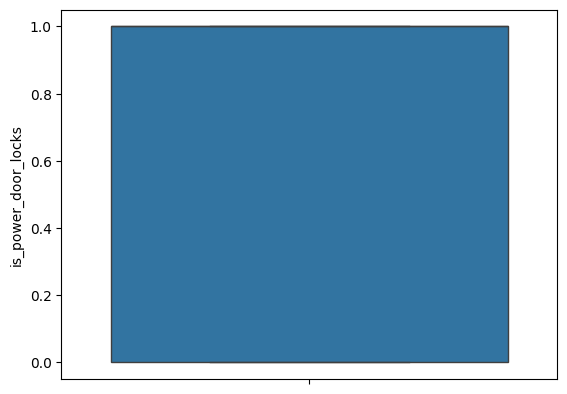

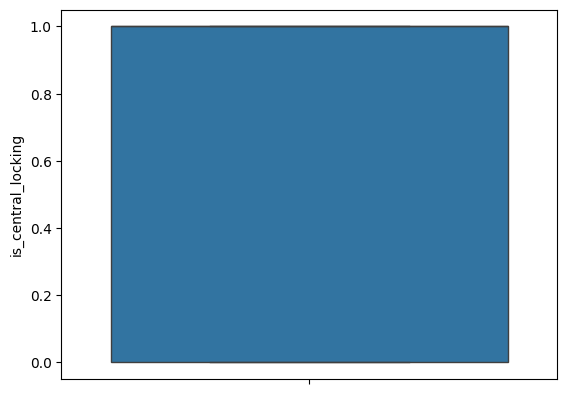

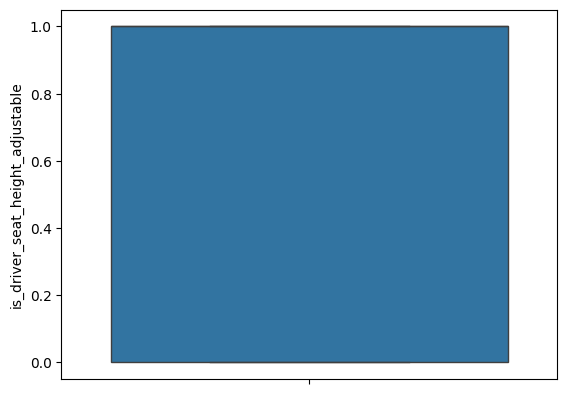

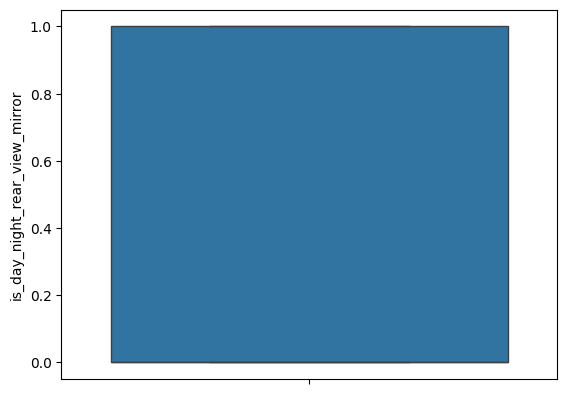

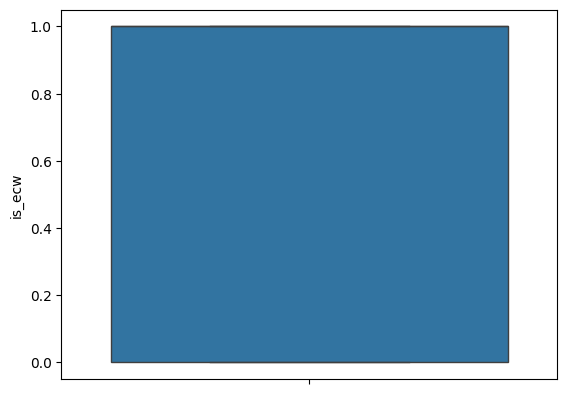

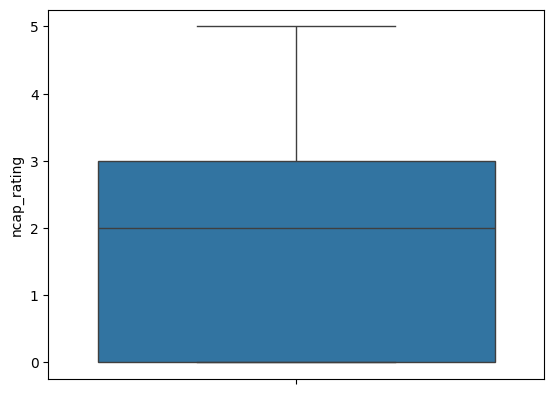

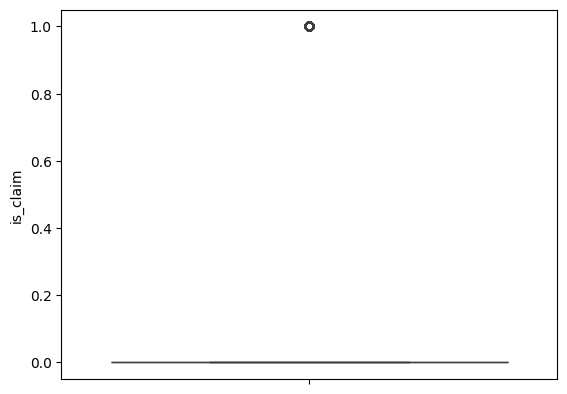

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
# Find the distribution of the data
def boxplots(col):
    sns.boxplot(DataP[col])
    plt.show()

for i in list(DataP.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [24]:
df = DataP
def value_counts_and_percentages(df):
    result = {}
    for column in df.columns:
        value_counts = df[column].value_counts()
        percentages = (value_counts / len(df)) * 100
        result[column] = pd.DataFrame({
            'Count': value_counts,
            'Percentage': percentages
        })
    return result

# Get the value counts and percentages for each column
value_counts_percentages = value_counts_and_percentages(df)

# Display the result
for column, stats in value_counts_percentages.items():
    print(f"Column: {column}")
    print(stats)
    print("\n")

Column: policy_id
         Count  Percentage
ID00001      1    0.001707
ID39053      1    0.001707
ID39055      1    0.001707
ID39056      1    0.001707
ID39057      1    0.001707
...        ...         ...
ID19535      1    0.001707
ID19536      1    0.001707
ID19537      1    0.001707
ID19538      1    0.001707
ID58592      1    0.001707

[58592 rows x 2 columns]


Column: policy_tenure
    Count  Percentage
1    7321   12.494880
12   6400   10.922993
13   5906   10.079874
14   5384    9.188968
0    5346    9.124113
3    3824    6.526488
6    3753    6.405311
2    3629    6.193678
4    2955    5.043351
7    2848    4.860732
5    2688    4.587657
9    2271    3.875956
10   2174    3.710404
8    2045    3.490238
11   1771    3.022597
15    266    0.453987
16     11    0.018774


Column: area_cluster
     Count  Percentage
C8   13654   23.303523
C2    7342   12.530721
C5    6979   11.911182
C3    6101   10.412684
C14   3660    6.246587
C13   3423    5.842094
C10   3155    5.384694
C9   

In [25]:
#dropping columns with 100% bias becaue it gives no pattern

DataP= DataP.drop(['age_of_car_encoded','policy_id'], axis = 1)


In [26]:
# Dropping columns with less info
DataP= DataP.drop(['max_power','max_torque'], axis = 1)





In [27]:
DataP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  int64  
 1   area_cluster                      58592 non-null  object 
 2   population_density                58592 non-null  float64
 3   make                              58592 non-null  int64  
 4   segment                           58592 non-null  object 
 5   model                             58592 non-null  object 
 6   fuel_type                         58592 non-null  object 
 7   engine_type                       58592 non-null  object 
 8   airbags                           58592 non-null  int64  
 9   is_esc                            58592 non-null  int64  
 10  is_adjustable_steering            58592 non-null  int64  
 11  is_tpms                           58592 non-null  int64  
 12  is_p

In [28]:
# Checking data distribution
DataP.plot(kind = "box", subplots =True, layout = (6,6), figsize = (100,100) )



policy_tenure                           Axes(0.125,0.77;0.110714x0.11)
population_density                   Axes(0.257857,0.77;0.110714x0.11)
make                                 Axes(0.390714,0.77;0.110714x0.11)
airbags                              Axes(0.523571,0.77;0.110714x0.11)
is_esc                               Axes(0.656429,0.77;0.110714x0.11)
is_adjustable_steering               Axes(0.789286,0.77;0.110714x0.11)
is_tpms                                Axes(0.125,0.638;0.110714x0.11)
is_parking_sensors                  Axes(0.257857,0.638;0.110714x0.11)
is_parking_camera                   Axes(0.390714,0.638;0.110714x0.11)
displacement                        Axes(0.523571,0.638;0.110714x0.11)
cylinder                            Axes(0.656429,0.638;0.110714x0.11)
gear_box                            Axes(0.789286,0.638;0.110714x0.11)
turning_radius                         Axes(0.125,0.506;0.110714x0.11)
length                              Axes(0.257857,0.506;0.110714x0.11)
width 

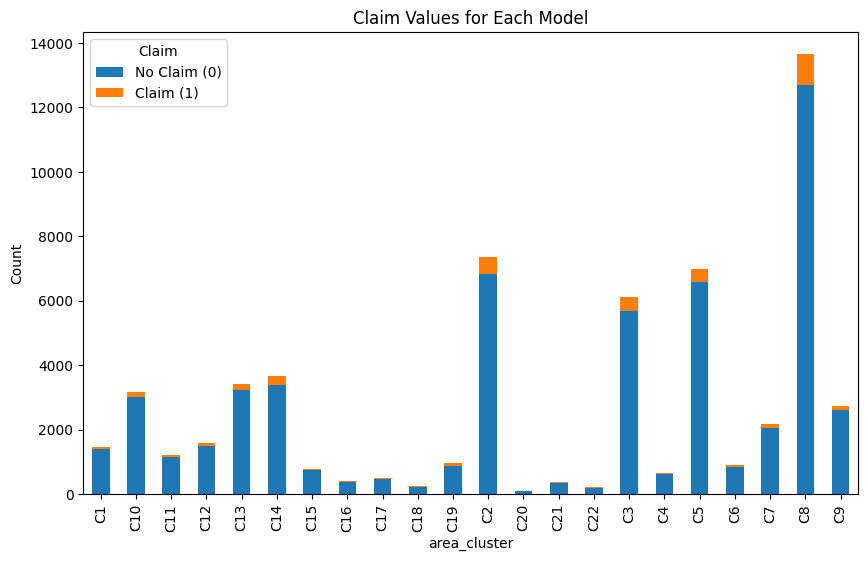

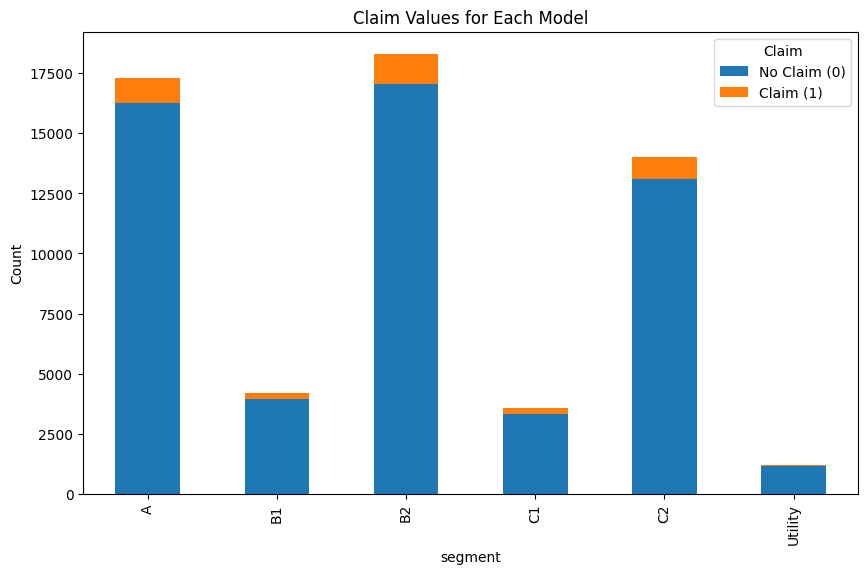

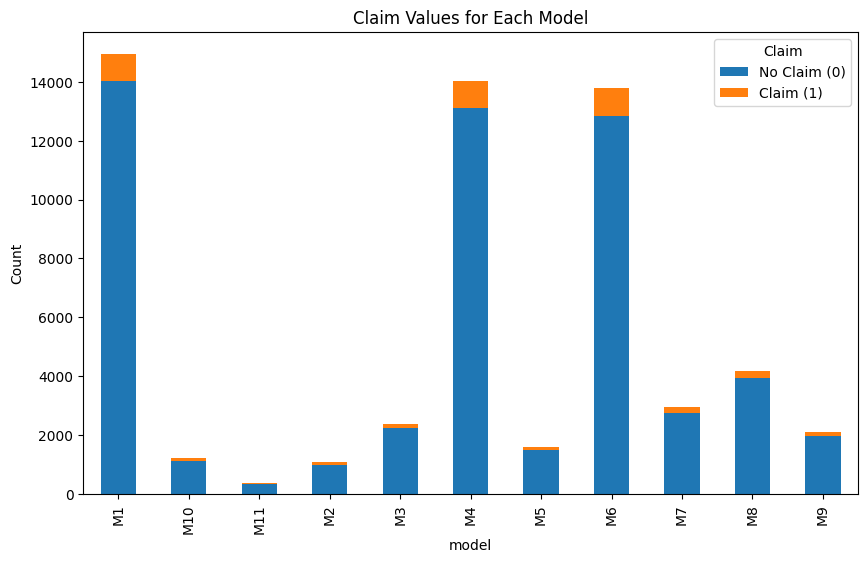

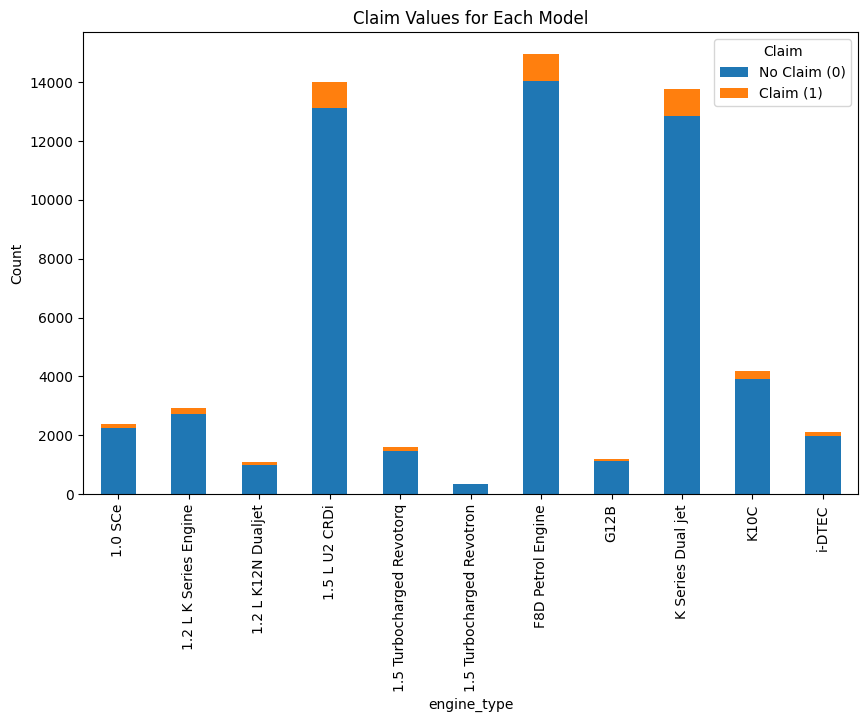

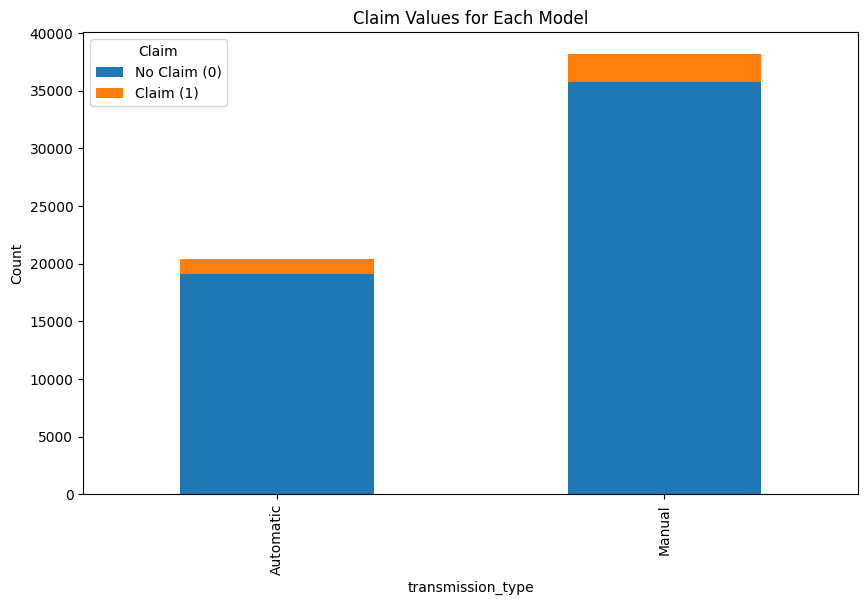

In [29]:
df = pd.DataFrame(DataP)

# Function to plot the claim values for each model
def plot_claim_values(df, model_column, claim_column):
    # Pivot table to get counts of claim values for each model
    claim_counts = df.pivot_table(index=model_column, columns=claim_column, aggfunc='size', fill_value=0)

    # Plotting
    claim_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Claim Values for Each Model')
    plt.ylabel('Count')
    plt.xlabel(f'{model_column}')
    plt.legend(title='Claim', labels=['No Claim (0)', 'Claim (1)'])
    plt.show()

# Plot the claim values for each model
obj_col = ['area_cluster','segment','model', 'engine_type','transmission_type' ]
for i in obj_col:
    plot_claim_values(df, i , 'is_claim')


In [30]:
DataP.transmission_type_Encoded = DataP.transmission_type.map({"Automatic":1,"Manual":0})


<ipython-input-30-7810f0403494>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  DataP.transmission_type_Encoded = DataP.transmission_type.map({"Automatic":1,"Manual":0})


<ipython-input-31-0f90bbd0f225>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_claim', y='policy_tenure', data=d1, palette='coolwarm')


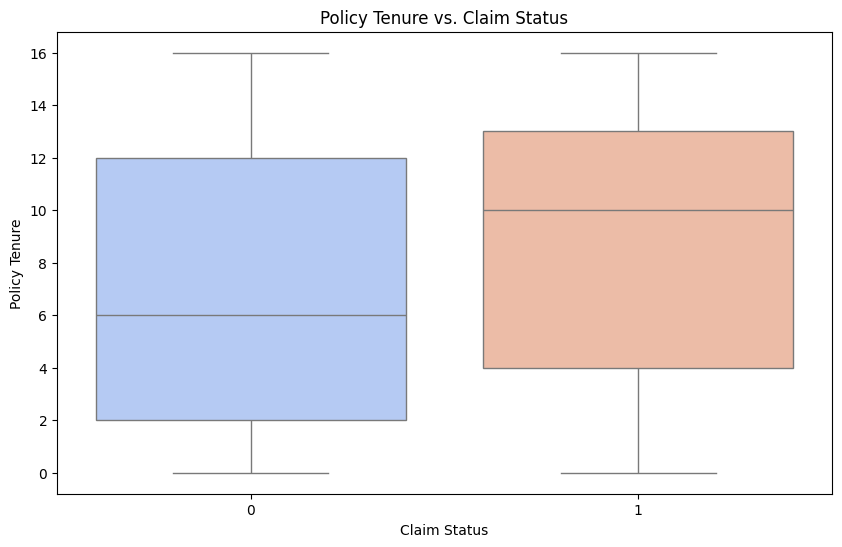

In [31]:
d1 = pd.DataFrame(DataP)

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_claim', y='policy_tenure', data=d1, palette='coolwarm')
plt.xlabel('Claim Status')
plt.ylabel('Policy Tenure')
plt.title('Policy Tenure vs. Claim Status')
plt.show()


In [32]:
def treat_outliers(df, columns):
    df_treated = df.copy()
    for column in columns:
        Q1 = df_treated[column].quantile(0.25)
        Q3 = df_treated[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_value = df_treated[column].median()

        # Replace outliers with the median value
        df_treated[column] = np.where(df_treated[column] < lower_bound, median_value, df_treated[column])
        df_treated[column] = np.where(df_treated[column] > upper_bound, median_value, df_treated[column])
    return df_treated

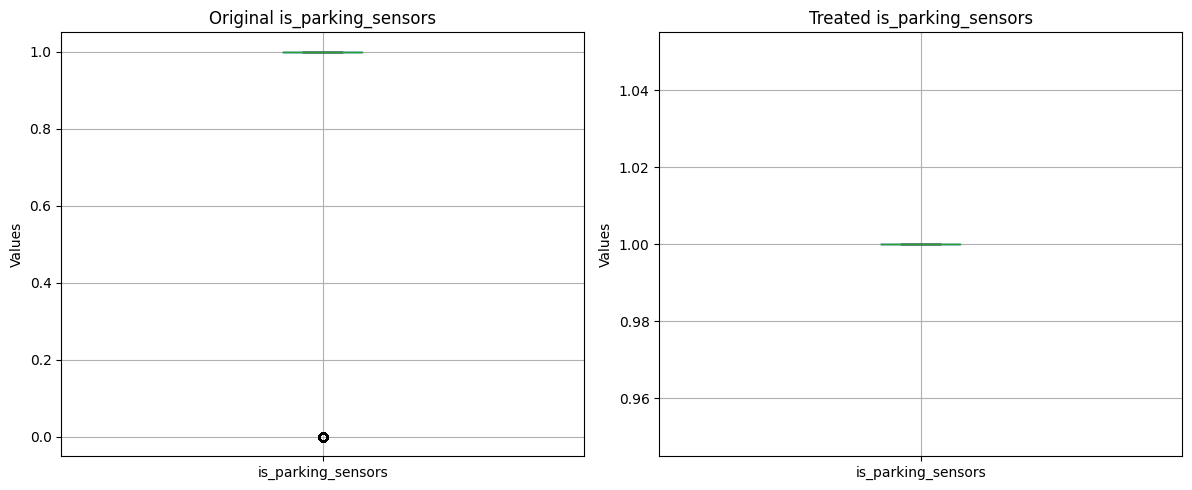

In [33]:


df = pd.DataFrame(DataP)

# List of columns to identify and treat outliers
ToidentifyOutlier = ['is_parking_sensors']

# Treat outliers in the selected columns
df_treated = treat_outliers(df, ToidentifyOutlier)

# Function to plot box plots for selected columns as subplots
def plotp(df_original, df_treated, columns):
    num_columns = len(columns)
    num_plots = num_columns * 2  # Since we're plotting original and treated data side by side
    num_rows = (num_plots + 2) // 3  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, column in enumerate(columns):
        # Original data
        df_original.boxplot(column=column, ax=axes[i * 2])
        axes[i * 2].set_title(f'Original {column}')
        axes[i * 2].set_ylabel('Values')

        # Treated data
        df_treated.boxplot(column=column, ax=axes[i * 2 + 1])
        axes[i * 2 + 1].set_title(f'Treated {column}')
        axes[i * 2 + 1].set_ylabel('Values')

    # Remove any empty subplots
    for j in range(i * 2 + 2, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Plot the box plots for the original and treated data
plotp(df, df_treated, ToidentifyOutlier)


In [34]:
for column in ToidentifyOutlier:
    DataP[column] = df_treated[column]

In [35]:
DataP.head()

,policy_tenure,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,ncap_rating,is_claim,age_of_policyholder_encoded
0,6,C1,17.088352,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1.0,0,Drum,9.267680,3,Manual,5,Power,4,3445,11.485173,11.383191,1185,0,0,0,0,0,0,0,0,0,0,0,0,more than 6 months
1,8,C2,30.001111,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1.0,0,Drum,9.267680,3,Manual,5,Power,4,3445,11.485173,11.383191,1185,0,0,0,0,0,0,0,0,0,0,0,0,less than 6 months
2,10,C3,15.973916,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1.0,0,Drum,9.267680,3,Manual,5,Power,4,3445,11.485173,11.383191,1185,0,0,0,0,0,0,0,0,0,0,0,0,less than 6 months
3,10,C4,27.858985,1,C1,M2,Petrol,1.2 L K12N Dualjet,2,1,1,0,1.0,1,Drum,10.617723,4,Automatic,5,Electric,4,3995,12.016182,11.485173,1335,1,0,0,1,1,1,1,1,1,1,2,0,less than 6 months
4,7,C5,32.628838,2,A,M3,Petrol,1.0 SCe,2,0,0,0,1.0,1,Drum,9.996666,3,Automatic,5,Electric,5,3731,11.644675,11.421648,1155,0,0,0,0,0,1,1,0,1,1,2,0,more than 6 months


policy_tenure                           Axes(0.125,0.77;0.110714x0.11)
population_density                   Axes(0.257857,0.77;0.110714x0.11)
make                                 Axes(0.390714,0.77;0.110714x0.11)
airbags                              Axes(0.523571,0.77;0.110714x0.11)
is_esc                               Axes(0.656429,0.77;0.110714x0.11)
is_adjustable_steering               Axes(0.789286,0.77;0.110714x0.11)
is_tpms                                Axes(0.125,0.638;0.110714x0.11)
is_parking_sensors                  Axes(0.257857,0.638;0.110714x0.11)
is_parking_camera                   Axes(0.390714,0.638;0.110714x0.11)
displacement                        Axes(0.523571,0.638;0.110714x0.11)
cylinder                            Axes(0.656429,0.638;0.110714x0.11)
gear_box                            Axes(0.789286,0.638;0.110714x0.11)
turning_radius                         Axes(0.125,0.506;0.110714x0.11)
length                              Axes(0.257857,0.506;0.110714x0.11)
width 

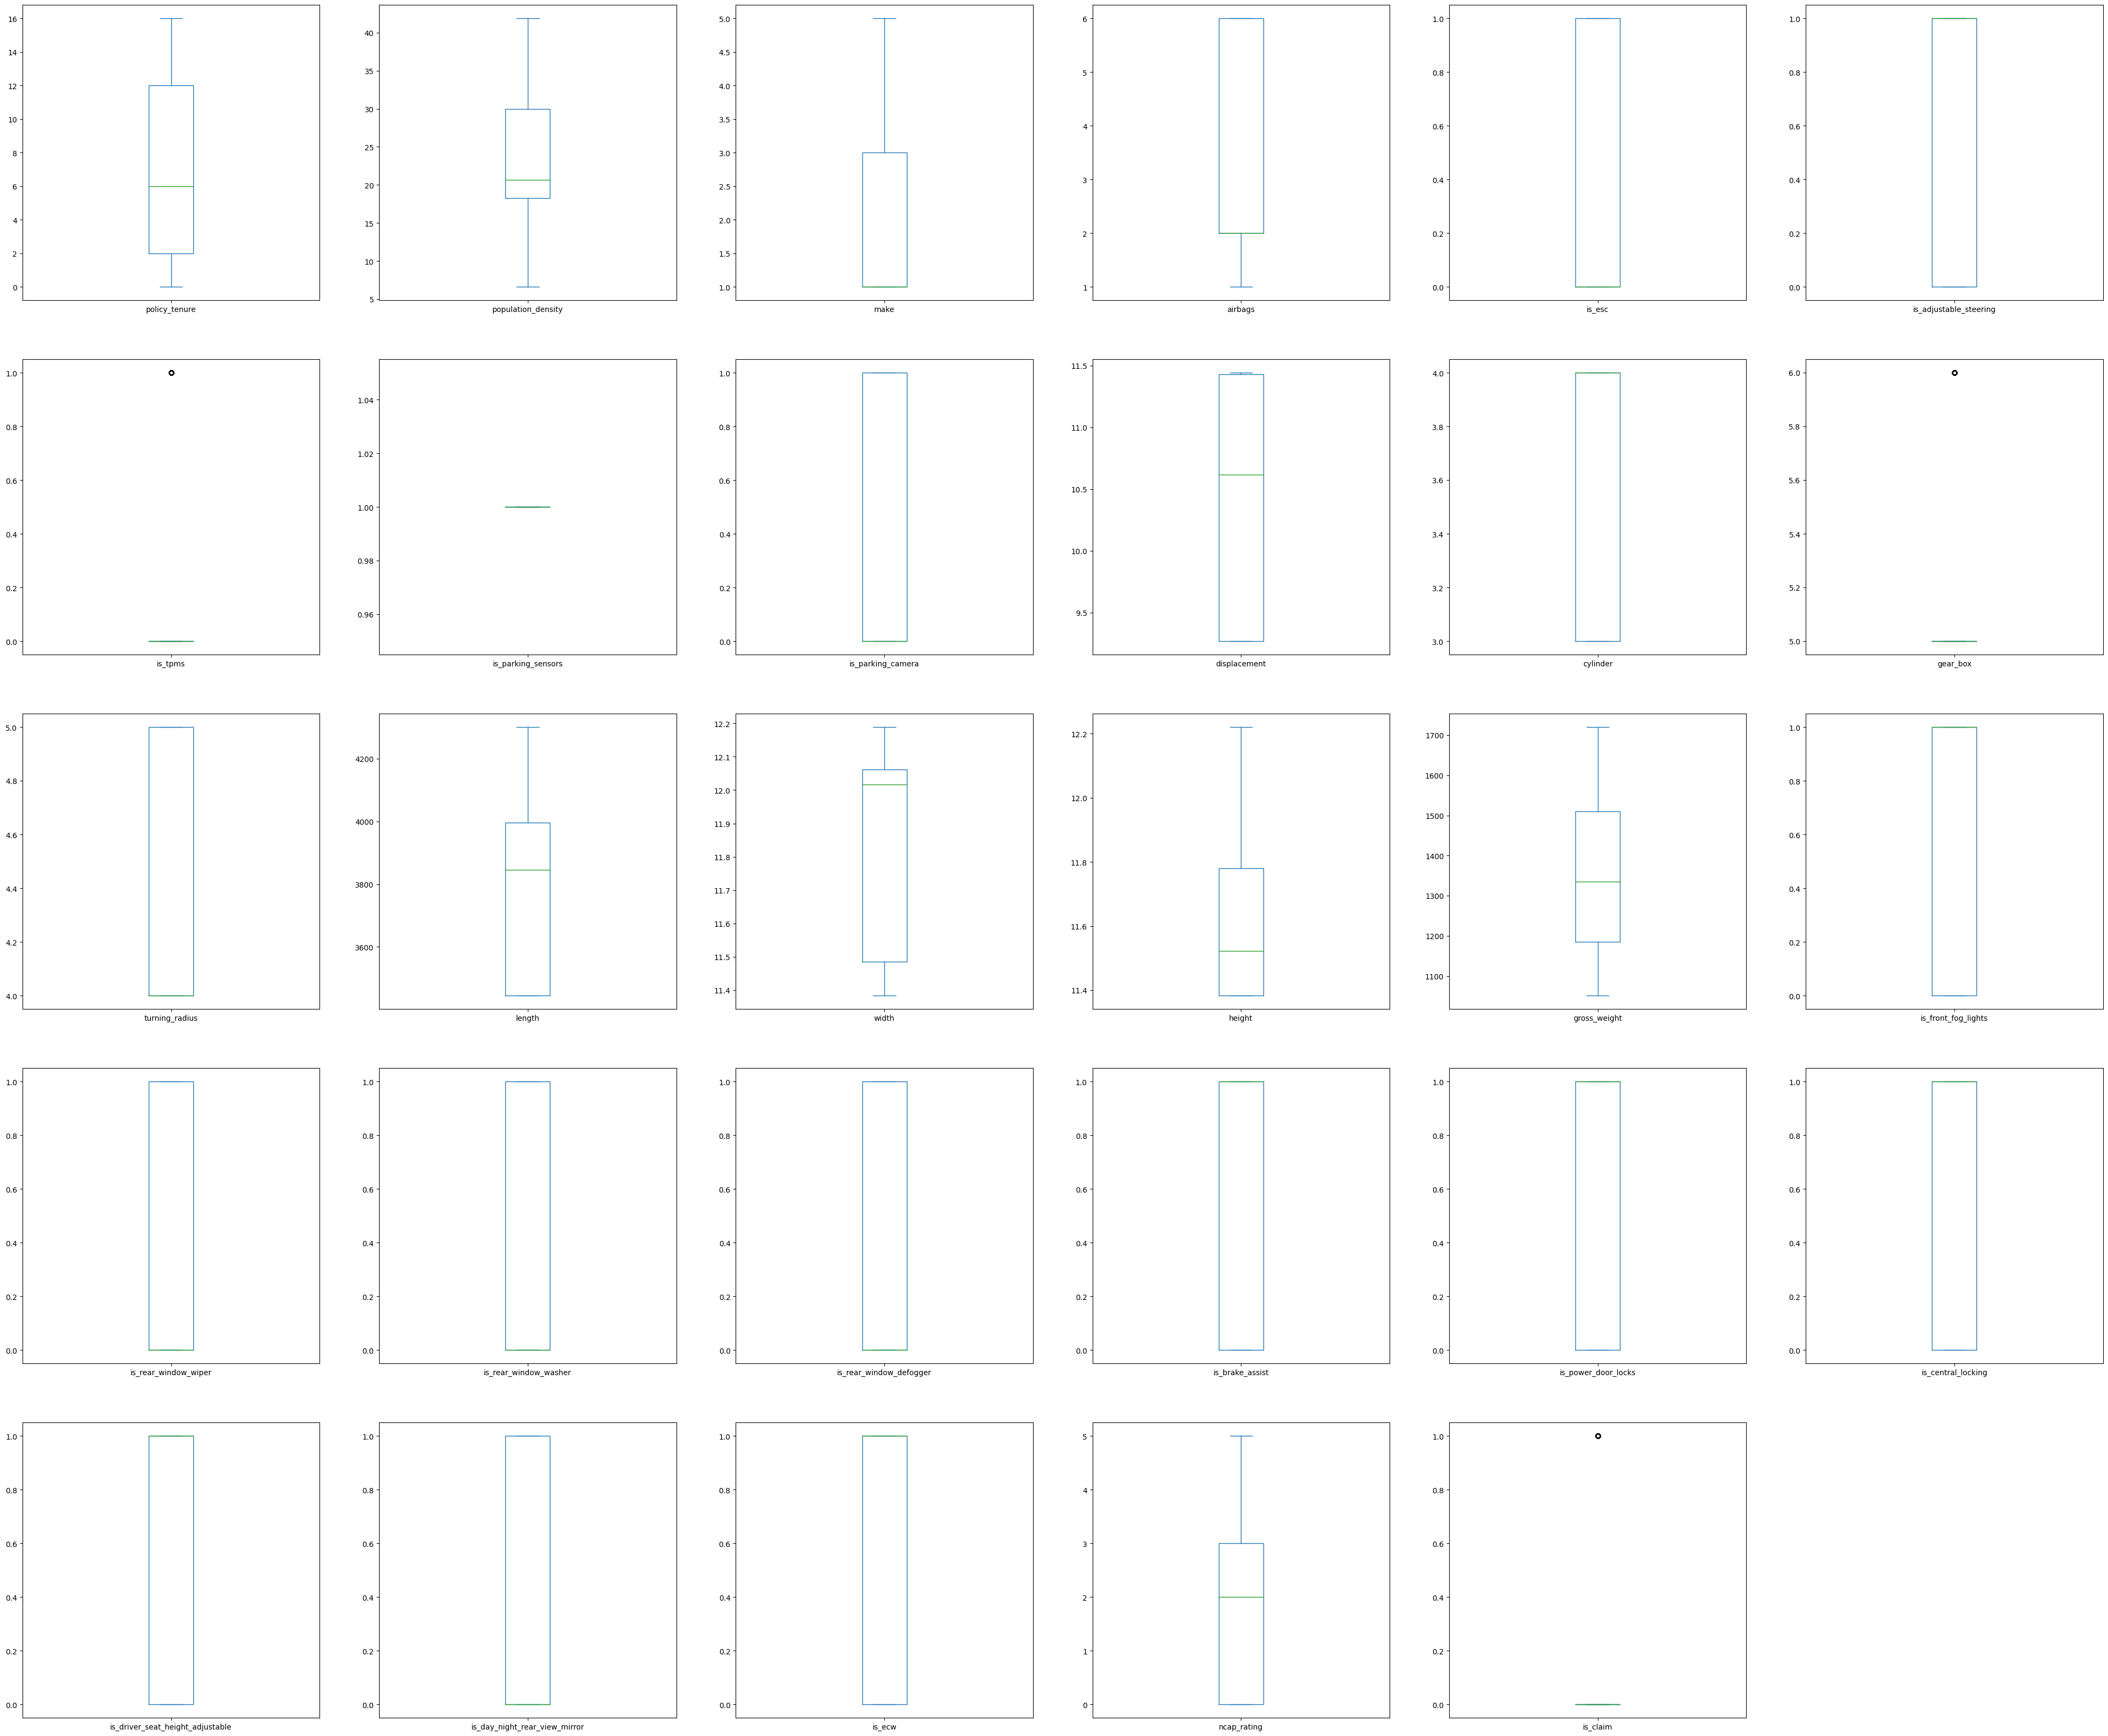

In [36]:
DataP.plot(kind = "box", subplots =True, layout = (6,6), figsize = (50,50) )

0    54844
1     3748
Name: is_claim, dtype: int64


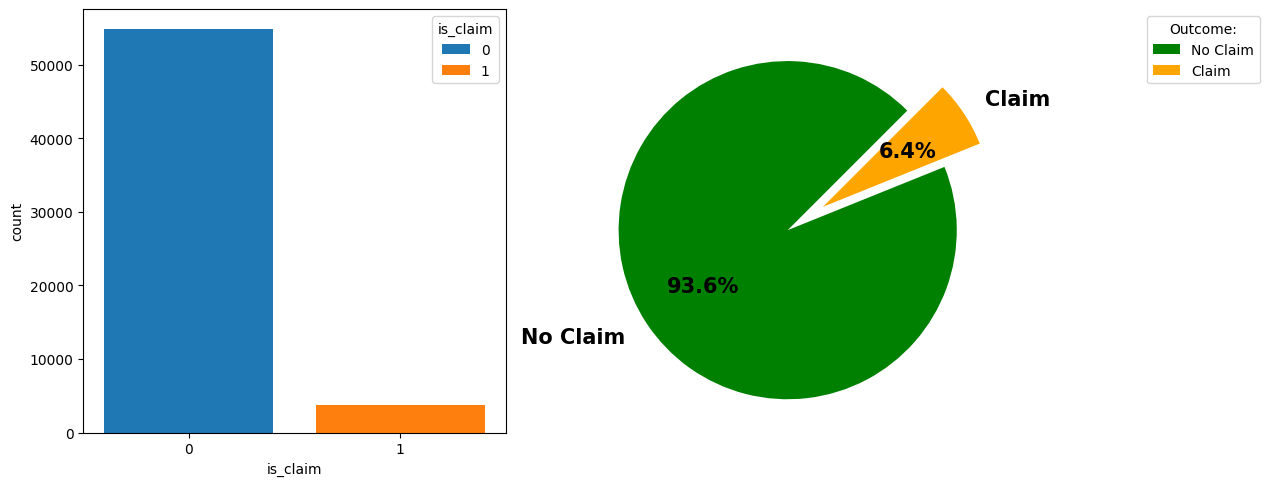

In [37]:
#Exploring Traget Value column

print(DataP['is_claim'].value_counts())


fig = plt.figure(figsize=(12,5.5))
ax1 = fig.add_subplot(1, 2, 1)
sns.countplot(x=DataP['is_claim'],data=DataP,saturation=1,hue='is_claim')



ax2 = fig.add_subplot(1, 2, 2)

plt.pie(DataP['is_claim'].value_counts(),labels=['No Claim','Claim'],radius=1,colors = ['green','orange'],
        autopct='%1.1f%%',explode = [0.1,0.15],labeldistance=1.15,startangle = 45,
        textprops={'fontsize': 15,'fontweight':'bold'})

plt.legend(title = 'Outcome:',loc='upper right', bbox_to_anchor=(1.6,1))
plt.show()

In [38]:
DataP.head()

,policy_tenure,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,ncap_rating,is_claim,age_of_policyholder_encoded
0,6,C1,17.088352,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1.0,0,Drum,9.267680,3,Manual,5,Power,4,3445,11.485173,11.383191,1185,0,0,0,0,0,0,0,0,0,0,0,0,more than 6 months
1,8,C2,30.001111,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1.0,0,Drum,9.267680,3,Manual,5,Power,4,3445,11.485173,11.383191,1185,0,0,0,0,0,0,0,0,0,0,0,0,less than 6 months
2,10,C3,15.973916,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1.0,0,Drum,9.267680,3,Manual,5,Power,4,3445,11.485173,11.383191,1185,0,0,0,0,0,0,0,0,0,0,0,0,less than 6 months
3,10,C4,27.858985,1,C1,M2,Petrol,1.2 L K12N Dualjet,2,1,1,0,1.0,1,Drum,10.617723,4,Automatic,5,Electric,4,3995,12.016182,11.485173,1335,1,0,0,1,1,1,1,1,1,1,2,0,less than 6 months
4,7,C5,32.628838,2,A,M3,Petrol,1.0 SCe,2,0,0,0,1.0,1,Drum,9.996666,3,Automatic,5,Electric,5,3731,11.644675,11.421648,1155,0,0,0,0,0,1,1,0,1,1,2,0,more than 6 months


In [39]:
#Dealing Categorical Columns

##DataP['transmission_type_Encoded'] = pd.get_dummies(DataP['transmission_type'])['Manual'].astype('int')

#LeassThan6 months =1
#DataP['age_of_policyholder_Encoded'] = pd.get_dummies(DataP['age_of_policyholder_encoded'])['less than 6 months'].astype('int')


#DataP = DataP.drop(['transmission_type','engine_type','segment','model','area_cluster','age_of_policyholder_encoded'] ,axis =1)



In [40]:
DataP = DataP.drop(['segment','model','area_cluster'],axis =1)
from sklearn.preprocessing import LabelEncoder

#df = pd.DataFrame(DataP)

columns_to_encode = ['fuel_type', 'steering_type', 'age_of_policyholder_encoded', 'transmission_type','engine_type','rear_brakes_type']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each specified column
for column in columns_to_encode:
    DataP[column] = label_encoder.fit_transform(DataP[column])




In [41]:
#Dealing Categorical Columns

#DataP['transmission_type_Encoded'] = pd.get_dummies(DataP['transmission_type'])['Manual'].astype('int')

#LessThan6 months =1
#DataP['age_of_policyholder_Encoded'] = pd.get_dummies(DataP['age_of_policyholder_encoded'])['less than 6 months'].astype('int')


#DataP = DataP.drop(['transmission_type','engine_type','segment','model','area_cluster','age_of_policyholder_encoded'] ,axis =1)



In [42]:
DataP.head()

,policy_tenure,population_density,make,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,ncap_rating,is_claim,age_of_policyholder_encoded
0,6,17.088352,1,0,6,2,0,0,0,1.0,0,1,9.267680,3,1,5,2,4,3445,11.485173,11.383191,1185,0,0,0,0,0,0,0,0,0,0,0,0,1
1,8,30.001111,1,0,6,2,0,0,0,1.0,0,1,9.267680,3,1,5,2,4,3445,11.485173,11.383191,1185,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10,15.973916,1,0,6,2,0,0,0,1.0,0,1,9.267680,3,1,5,2,4,3445,11.485173,11.383191,1185,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10,27.858985,1,2,2,2,1,1,0,1.0,1,1,10.617723,4,0,5,0,4,3995,12.016182,11.485173,1335,1,0,0,1,1,1,1,1,1,1,2,0,0
4,7,32.628838,2,2,0,2,0,0,0,1.0,1,1,9.996666,3,0,5,0,5,3731,11.644675,11.421648,1155,0,0,0,0,0,1,1,0,1,1,2,0,1


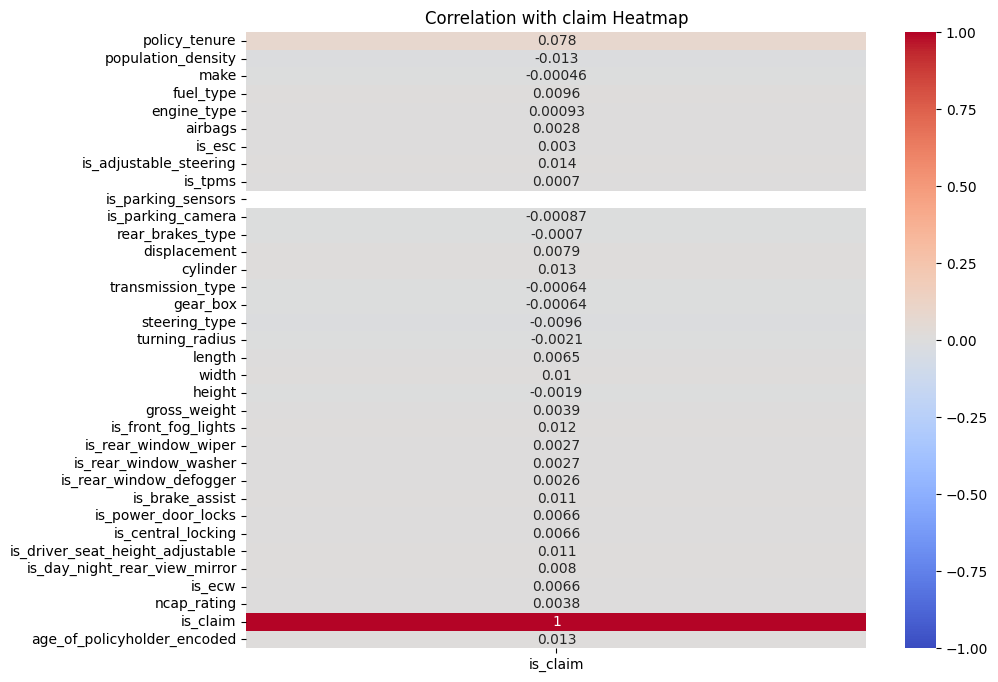

is_claim                            1.000000
policy_tenure                       0.078461
is_adjustable_steering              0.013917
cylinder                            0.013434
age_of_policyholder_encoded         0.012719
is_front_fog_lights                 0.011825
is_brake_assist                     0.010893
is_driver_seat_height_adjustable    0.010686
width                               0.009964
fuel_type                           0.009612
is_day_night_rear_view_mirror       0.007989
displacement                        0.007913
is_ecw                              0.006637
is_central_locking                  0.006637
is_power_door_locks                 0.006637
length                              0.006495
gross_weight                        0.003894
ncap_rating                         0.003800
is_esc                              0.002995
airbags                             0.002789
is_rear_window_wiper                0.002651
is_rear_window_washer               0.002651
is_rear_wi

In [43]:
correlation_with_claim = DataP.corr()['is_claim']

# Plot the correlation heatmap for correlations with the target column
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_claim.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with claim Heatmap')
plt.show()

sorted_correlation_with_claim = correlation_with_claim.sort_values(ascending=False)
print(sorted_correlation_with_claim)
# oservation
#Features overall contribute similary to claim. Not much correlation of dominant feature

In [44]:
sorted_correlation_with_claim = correlation_with_claim.sort_values(ascending=False)
print(sorted_correlation_with_claim)

is_claim                            1.000000
policy_tenure                       0.078461
is_adjustable_steering              0.013917
cylinder                            0.013434
age_of_policyholder_encoded         0.012719
is_front_fog_lights                 0.011825
is_brake_assist                     0.010893
is_driver_seat_height_adjustable    0.010686
width                               0.009964
fuel_type                           0.009612
is_day_night_rear_view_mirror       0.007989
displacement                        0.007913
is_ecw                              0.006637
is_central_locking                  0.006637
is_power_door_locks                 0.006637
length                              0.006495
gross_weight                        0.003894
ncap_rating                         0.003800
is_esc                              0.002995
airbags                             0.002789
is_rear_window_wiper                0.002651
is_rear_window_washer               0.002651
is_rear_wi

In [45]:
DataP.describe()

,policy_tenure,population_density,make,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,ncap_rating,is_claim,age_of_policyholder_encoded
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.0,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,6.910585,24.361346,1.763722,1.003448,5.502748,3.137066,0.314053,0.606329,0.239248,1.0,0.390634,0.760752,10.449976,3.626963,0.651642,5.245443,1.164203,4.313217,3850.476891,11.863448,11.577948,1385.276813,0.579055,0.289425,0.289425,0.350133,0.549171,0.724246,0.724246,0.585251,0.380308,0.724246,1.759950,0.063968,0.379011
std,4.942758,7.520297,1.136988,0.835104,2.684796,1.832641,0.464142,0.488568,0.426628,0.0,0.487897,0.426628,0.825087,0.483616,0.476454,0.430353,0.975920,0.463806,311.457119,0.268477,0.194750,212.423085,0.493715,0.453499,0.453499,0.477016,0.497581,0.446897,0.446897,0.492683,0.485467,0.446897,1.389576,0.244698,0.485145
min,0.000000,6.619106,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,9.267680,3.000000,0.000000,5.000000,0.000000,4.000000,3445.000000,11.383191,11.383191,1051.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,18.283575,1.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,9.267680,3.000000,0.000000,5.000000,0.000000,4.000000,3445.000000,11.485173,11.383191,1185.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,20.640909,1.000000,1.000000,6.000000,2.000000,0.000000,1.000000,0.000000,1.0,0.000000,1.000000,10.617723,4.000000,1.000000,5.000000,2.000000,4.000000,3845.000000,12.016182,11.522954,1335.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000
75%,12.000000,30.001111,3.000000,2.000000,8.000000,6.000000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,11.429308,4.000000,1.000000,5.000000,2.000000,5.000000,3995.000000,12.062177,11.780740,1510.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000
max,16.000000,41.875291,5.000000,2.000000,10.000000,6.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,11.442053,4.000000,1.000000,6.000000,2.000000,5.000000,4300.000000,12.189133,12.220462,1720.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000


### Correcting Data imbalance

In [46]:
from imblearn.over_sampling import SMOTE

X = DataP.drop('is_claim', axis=1)  # Features
y = DataP['is_claim']  # Target variable

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count of each class after resampling
print(pd.Series(y_resampled).value_counts())

0    54844
1    54844
Name: is_claim, dtype: int64


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


### Train and Test Split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

### Feature Engineering- RFE Approach

> Add blockquote



In [49]:
rforest = RandomForestClassifier(criterion='entropy')


In [50]:
selector = RFE(estimator= rforest, n_features_to_select=35, step=1)

In [51]:
selector = selector.fit(x_train, y_train)

In [52]:
selector.n_features_

34

In [53]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [54]:
df = pd.DataFrame({'Feature': X.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
0,policy_tenure,1
1,population_density,1
2,make,1
3,fuel_type,1
4,engine_type,1
5,airbags,1
6,is_esc,1
7,is_adjustable_steering,1
8,is_tpms,1
9,is_parking_sensors,1


In [55]:
y_pred_train = selector.predict(x_train)
y_pred_test = selector.predict(x_test)

In [56]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [57]:
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     41133
           1       0.88      0.04      0.07      2811

    accuracy                           0.94     43944
   macro avg       0.91      0.52      0.52     43944
weighted avg       0.93      0.94      0.91     43944


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13711
           1       0.11      0.00      0.01       937

    accuracy                           0.93     14648
   macro avg       0.52      0.50      0.49     14648
weighted avg       0.88      0.93      0.90     14648



In [58]:
print(accuracy_score(y_train, y_pred_train))
print()
print(accuracy_score(y_test, y_pred_test))

0.9380347715273986

0.9341206990715456


In [59]:
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))

[[41119    14]
 [ 2709   102]]

[[13679    32]
 [  933     4]]


In [ ]:
!pip install dataprep
import dataprep
from dataprep.eda import create_report
create_report(DataP)